# <font color="#704214">PP_005: HIGH VALUE CUSTOMER IDENTIFICATION (INSIDERS)</font>

## <font color='8a795d'>Ciclo 00 - Planning - IOT Method</font>

## <font color='8a795d'>Ciclo 01 - Clusters Validation Metrics</font>

**1. Feature Engineering**
   - Recency
   - Frequency
   - Monetary

**2. Clustering Validation Metrics**
   - WSS (Within-Cluster Sum of Square)
   - SS (Silhouette Score)

**3. Cluster Analysis**
   - 3D Plot
   - Cluster Profile

## <font color='8a795d'>Ciclo 02 - Silhouette Analysis</font>

**1. Feature Engineering**
   - Average Ticket

**2. Silhouette Analysis**
   - Silhouette Analysis

**3. Cluster Visualization**
   - UMAP

**4. Cluster Profile Analysis**
   - Cluster's Centroids Description

## <font color='8a795d'>Ciclo 03 - Statistical Descriptive</font>

**1. Descriptive Analysis**
   - Numerical Attributes
   - Categorical Attributes

**2. Feature Engineering**
   - Average Recency
   - Number of Returns

**3. Data Preparation**
   - MinMax Scaler

## <font color='8a795d'>Ciclo 04 - Feature Engineering</font>

**1. Replace NA**
   - Customer Id

**2. Feature Engineering**
   - Quantity of purchases
   - Variety of purchased products
   - Quantity of purchased items
   - Average Recency Days
   - Frequency Purchase
   - Quantity of Returns
   - Frequency Returns
   - Average Basket Size
   - Average Basket Variety

## <font color='8a795d'>Ciclo 05 - EDA</font>

**1. Parte I (Pandas Profiling)**
   - Univariate Analysis
   - Bivariate Analysis

# <font color='8a795d'>Solution Planning (IOT)</font>

### INPUT (ENTRADA)

1. **PROBLEMA DE NEGÓCIO**
    - Selecionar os clientes mais valiosos para integrar um programa de fidelidade chamado **"INSIDERS"**
    
    
2. **CONJUNTO DE DADOS**
    - Vendas de um e-commerce online, durante o período de 1 ano (Nov 2015 to Dec 2017)

### OUTPUT (SAÍDA)

1. **LISTA DE CLIENTES**
 - Uma lista com a indicação das pessoas que farão parte do programa **INSIDERS**
    
    
2. **RELATÓRIO DE RESPOSTAS**
 - Um relatório contendo as respostas para as seguintes perguntas de negócio:
    - *Quem são as pessoas elegíveis para participar do programa de Insiders ?*
    - *Quantos clientes farão parte do grupo?*
    - *Quais as principais características desses clientes ?*
    - *Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?*
    - *Qual a expectativa de faturamento desse grupo para os próximos meses ?*
    - *Quais as condições para uma pessoa ser elegível ao Insiders ?*
    - *Quais as condições para uma pessoa ser removida do Insiders ?*
    - *Qual a garantia que o programa Insiders é melhor que o restante da base ?*
    - *Quais ações o time de marketing pode realizar para aumentar o faturamento?*    

### TASKS (TAREFAS)

***1. Quem são as pessoas elegíveis para participar do programa de Insiders?***
 - O que é ser ***ELEGÍVEL***? Como a empresa define um cliente ***VALIOSO***?
 - 3 Abordagens:
     - Faturamento:
          - Alto Ticket Médio (valor médio das compras)
          - Alto LTV (Lifetime Value: o valor retornado pelo cliente ao longo do tempo)
          - Baixa Recência (tempo desde a última compra) ou Alta Frequência ( quantidade de compras )
          - Alto Basket Size ( quantidade média de produtos comprados )
          - Baixa probabilidade de Churn (encerrar relacionamento/contrato)
          - Alta Previsão de LTV
          - Alta propensão de compra

     - Custo:
          - Baixo número de devoluções

     - Experiência:  
          - Média alta de avaliações
            
            
***2. Quantos clientes farão parte do grupo?***
  - Número de clientes
  - % do grupo em relação ao total de clientes
    
    
***3. Quais as principais características desses clientes?***
  - Escrever os principais atributos dos clientes
       - Idade
       - País
       - Salário
        
  - Escrever os principais comportamentos de compra dos clientes ( métricas de negócio )
       - Atributos da clusterização (vide acima)
    
    
***4. Qual a porcentagem de contribuição do faturamento, vinda do Insiders?***
  - Calcular o faturamento total da empresa durante o ano.
  - Calcular o faturamento (%) apenas do cluster Insiders.
  
    
***5. Qual a expectativa de faturamento desse grupo para os próximos meses?***
  - Cálculo do LTV do grupo Insiders
  - Séries Temporais ( ARMA, ARIMA, HoltWinter, etc )
  - Análise de COHORT
    

***6. Quais as condições para uma pessoa ser elegível ao Insiders?***
  - Qual o período de avaliação (semanal, mensal)?
  - O "desempenho" do cliente está próximo da média do cluster *Insiders*. 
    
    
***7. Quais as condições para uma pessoa ser removida do Insiders?***
  - O "desempenho" do cliente não está mais próximo da média do cluster *Insiders*. 
    
    
***8. Qual a garantia que o programa Insiders é melhor que o restante da base?***
  - Teste de Hipóteses
  - Teste A/B (Bayesiano)
    
    
***9. Quais ações o time de marketing pode realizar para aumentar o faturamento?***
  - Descontos
  - Preferências de escolha
  - Produtos exclusivos

# <font color='8a795d'>0.0 Settings</font>

## <font color='8a795d'>0.1 Imports</font>

In [1]:
import numpy               as np
import pandas              as pd
import seaborn             as sns
from   pandas_profiling    import ProfileReport
from   IPython.display     import HTML
from   umap                import umap_         as umap
from   plotly              import express       as px
from   matplotlib          import pyplot        as plt
from   sklearn             import preprocessing as pp
from   sklearn             import cluster       as cl
from   sklearn             import metrics       as m
from   yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

## <font color='8a795d'>0.2 Helper Functions</font>

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'ggplot' )
    plt.rcParams['figure.figsize'] = [24,9]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## <font color='8a795d'>0.3 Loading Dataset</font>

In [3]:
# load data
df_raw = pd.read_csv('../data/raw/ecommerce.csv')

# drop extra column
df_raw = df_raw.drop( columns=['Unnamed: 8'], axis=1 )

In [4]:
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


# <font color='8a795d'>1.0 Data Description</font>

In [5]:
#security copy
df1 = df_raw.copy()

## <font color='d2b48c'>1.1 Rename Columns</font>

In [6]:
cols_new = ['invoice_no', 'stock_code', 'description', 'quantity', 
            'invoice_date', 'unit_price', 'customer_id', 'country']
df1.columns = cols_new
df1.sample()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
229588,557064,23014,GLASS APOTHECARY BOTTLE ELIXIR,1,14-Jun-17,3.95,13263.0,United Kingdom


## <font color='d2b48c'>1.2 Data Dimensions</font>

In [7]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of cols: {}'.format(df1.shape[1]))

Number of rows: 541909
Number of cols: 8


## <font color='d2b48c'>1.3 Data Types</font>

In [8]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## <font color='d2b48c'>1.4 Check NA</font>

In [9]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## <font color='d2b48c'>1.5 Replace NA</font>

In [10]:
df_missing = df1.loc[df1['customer_id'].isna(),:]
df_not_missing = df1.loc[~df1['customer_id'].isna(),:]

In [11]:
print('Missing Shape: {}'.format(df_missing.shape))
print('Not Missing Shape: {}'.format(df_not_missing.shape))

Missing Shape: (135080, 8)
Not Missing Shape: (406829, 8)


In [12]:
# Assumption: pode haver invoice_no (compras) replicados nos dois subsets (missing and not missing)
# Explicação: algum erro de sistema pode ter apagado o customer_id de algum invoice_id que se encontra
# no outro subconjunto dos dados.
# Hipótese falsa.

In [13]:
# Assumption: No subset df_missing os invoice_no repetidos se referem a um único customer. 
# Action: replace customer_id = NaN by new id > maximum customer_id of df_not_missing subset
df_not_missing['customer_id'].max()

18287.0

In [14]:
# create reference: invoice_no uniques and sequential customer_id  
df_backup = pd.DataFrame(df_missing['invoice_no'].drop_duplicates())
df_backup['customer_id'] = np.arange(19000, 19000+len(df_backup),1)

# merge original with reference dataframe
df1 = pd.merge(df1, df_backup, on='invoice_no', how='left')

# coalesce
df1['customer_id'] = df1['customer_id_x'].combine_first(df1['customer_id_y'])

# drop extra columns
df1 = df1.drop(columns=['customer_id_x','customer_id_y'], axis=1)

In [15]:
df1.sample(5)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
223933,556495,21900,"KEY FOB , SHED",1,10-Jun-17,0.65,United Kingdom,18069.0
139011,548259,22713,CARD I LOVE LONDON,12,28-Mar-17,0.42,United Kingdom,14099.0
514654,579740,23263,SET OF 3 WOODEN HEART DECORATIONS,1,28-Nov-17,1.25,United Kingdom,22603.0
382404,569900,16045,POPART WOODEN PENCILS ASST,100,4-Oct-17,0.04,United Kingdom,17651.0
349801,567530,23128,FELTCRAFT BOY JEAN-PAUL KIT,4,19-Sep-17,4.95,Belgium,12390.0


In [16]:
df1.isna().sum()

invoice_no         0
stock_code         0
description     1454
quantity           0
invoice_date       0
unit_price         0
country            0
customer_id        0
dtype: int64

In [17]:
# # remove NA
# df1 = df1.dropna( subset=['description'] )
# print('Removed data: {:.2f}%'.format( ( 1 - ( df1.shape[0] / df_raw.shape[0] ) )*100 ) )

## <font color='d2b48c'>1.6 Change Dtypes</font>

In [18]:
# invoice_date
df1['invoice_date'] = pd.to_datetime( df1['invoice_date'], format='%d-%b-%y' )

# customer_id
df1['customer_id'] = df1['customer_id'].astype( int )

df1.sample(5)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
523778,580520,23494,VINTAGE DOILY DELUXE SEWING KIT,1,2017-12-02,5.95,United Kingdom,13521
318611,564837,22948,METAL DECORATION NAUGHTY CHILDREN,4,2017-08-28,1.66,United Kingdom,21574
35028,539434,22422,TOOTHPASTE TUBE PEN,1,2016-12-15,1.28,United Kingdom,19239
458388,575837,23506,MINI PLAYING CARDS SPACEBOY,1,2017-11-09,0.42,United Kingdom,12748
438482,574321,23321,SMALL WHITE HEART OF WICKER,3,2017-11-01,1.65,United Kingdom,16016


In [19]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
country                 object
customer_id              int64
dtype: object

## <font color='d2b48c'>1.7 Descriptive Statistics</font>

In [20]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
unit_price,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
customer_id,541909.0,16688.840453,2911.411352,12346.00,14367.00,16249.00,18283.00,22709.0


In [21]:
num_attributes = df1.select_dtypes( include=['int64','float64'])
cat_attributes = df1.select_dtypes( exclude=['int64','float64','datetime64[ns]'])

### <font color='d2b48c'>1.7.1 Numerical Attributes</font>

In [22]:
# central tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply(np.mean) ).T
ct2 = pd.DataFrame( num_attributes.apply(np.median) ).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.min ) ).T
d2 = pd.DataFrame( num_attributes.apply( np.max ) ).T
d3 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d4 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate
metrics_numerical = pd.concat( [d1, d2, d3, ct1, ct2, d4, d5, d6] ).T.reset_index()
metrics_numerical.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
metrics_numerical

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,quantity,-80995.00,80995.0,161990.00,9.552250,3.00,218.080957,-0.264076,119769.160031
1,unit_price,-11062.06,38970.0,50032.06,4.611114,2.08,96.759764,186.506972,59005.719097
2,customer_id,12346.00,22709.0,10363.00,16688.840453,16249.00,2911.408666,0.487449,-0.804287


**Numerical Attributes Investigating**
1. 'Quantity' negatives values: Devolution?
2. 'Unit_Price' zero values: Promotion?
3. 'Unit_Price' negative values: Discount?

### <font color='d2b48c'>1.7.2 Categorical Attributes</font>

In [23]:
cat_attributes.head()

,invoice_no,stock_code,description,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
1,536365,71053,WHITE METAL LANTERN,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom


#### **Invoice No**

In [24]:
# invoice_no: Há registros com letras e números

# filtrar e contar linhas cujo invoice_no possui letras
df_invoice_letter = df1.loc[df1['invoice_no'].apply( lambda x: bool( re.search('[^0-9]+',x) ) ),: ]
print('invoice_no únicos não numericos: {}'.format(len(df_invoice_letter['invoice_no'].unique())))

# Hipotese: todos os invoice_no correspondem a uma 'quantity' negativa
print('Total de Registros com invoice_no não numericos: {}'.format(len(df_invoice_letter)))
print('Total de Registros com quantity negativa: {}'.format(len(df_invoice_letter[df_invoice_letter['quantity']<0])))

# Assumption: 

invoice_no únicos não numericos: 3839
Total de Registros com invoice_no não numericos: 9291
Total de Registros com quantity negativa: 9288


#### **Stock Code**

In [25]:
# stock_code
# filtrar e contar linhas cujo stock_code possui letras
print('stock_code não numericos: {}'.format(len(df1.loc[df1['stock_code'].apply( 
    lambda x: bool( re.search('[^0-9]+',x) ) ),'stock_code' ])))

# filtrar e contar linhas cujo stock_code possui somente letras
print('stock_code somente letras: {}'.format(len(df1.loc[df1['stock_code'].apply( 
    lambda x: bool( re.search('^[a-zA-Z]+$',x) ) ),'stock_code' ])))

# Quais são os tipos de stock_code que possuem apenas letras
stock_code_list = df1.loc[df1['stock_code'].apply( lambda x: bool( re.search('^[a-zA-Z]+$',x) ) ),'stock_code' ].unique()
print('Tipos de stock_code literais:')
stock_code_list
# Assumption: todos os stock_code apenas literais não representam compras efetivas, portanto serão descartados

stock_code não numericos: 54873
stock_code somente letras: 2759
Tipos de stock_code literais:


array(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK'], dtype=object)

#### **Description**

In [26]:
# Assumption: a feature description é irrelevante para a compreensão do problema de negócio

#### **Country**

In [27]:
# Quantidade de países únicos
print('Quantidade de países únicos: {}'.format(len(df1['country'].unique())))
df1['country'].unique()

# Assumption: European Community e Unspecified não possuem significado como país. Serão excluídos da análise

Quantidade de países únicos: 38


array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [28]:
# Representatividade de cada país no negócio
df_qtd_country = df1['country'].value_counts()
df_perc_country = df1['country'].value_counts(normalize=True)
df_country = pd.concat([df_qtd_country,df_perc_country], axis=1).reset_index()
df_country.columns=['country','qtd_invoice','%_invoice']

# Quantos customers em cada country
df_cust_country = df1[['customer_id','country']].drop_duplicates().groupby('country').count().reset_index()
df_country = pd.merge(df_country, df_cust_country, on='country', how='left').sort_values('customer_id', ascending=False)

In [29]:
df_country.head()

,country,qtd_invoice,%_invoice,customer_id
0,United Kingdom,495478,0.914320,7587
1,Germany,9495,0.017521,95
2,France,8557,0.015790,90
3,EIRE,8196,0.015124,44
4,Spain,2533,0.004674,31


# <font color='8a795d'>2.0 Variable Filtering</font>

In [30]:
#security copy
df2 = df1.copy()

In [31]:
# unit_price > 0.04
df2 = df2.loc[df2['unit_price']>=0.04,:]

# stock_code != ['POST','D','DOT','M','S','AMAZONFEE','m','DCGSSBOY','DCGSSGIRL','PADS','B','CRUK']
df2 = df2[~df2['stock_code'].isin(['POST','D','DOT','M','S','AMAZONFEE','m',
                                   'DCGSSBOY','DCGSSGIRL','PADS','B','CRUK'])]

# description
df2 = df2.drop(columns='description', axis=1)

# country - risk
df2 = df2[~df2['stock_code'].isin(['Unspecified','European Community'])]

# quantity
df2_returns = df2.loc[df2['quantity']<0,:]
df2_purchases = df2.loc[df2['quantity']>=0,:]

# <font color='8a795d'>3.0 Feature Engineering</font>

In [32]:
#security copy
df3 = df2.copy()
df3_returns = df2_returns.copy()
df3_purchases = df2_purchases.copy()

## <font color='d2b48c'>3.1 Feature Creation</font>

In [33]:
# data reference
df_ref = df3.drop( ['invoice_no', 'stock_code', 'quantity', 'invoice_date', 'unit_price', 'country'], 
                  axis=1 ).drop_duplicates().reset_index( drop=True )

### <font color='d2b48c'>3.1.1 Gross Revenue</font>

In [34]:
# Gross Revenue (Faturamento) = quantity * price
df3_purchases.loc[:,'gross_revenue'] = df3_purchases.loc[:,'quantity'] * df3_purchases.loc[:,'unit_price']

# Monetary
df_monetary = (df3_purchases[['customer_id','gross_revenue']]
               .groupby('customer_id')
               .sum()
               .reset_index())

# merge
df_ref = pd.merge( df_ref, df_monetary, on='customer_id', how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue    91
dtype: int64

### <font color='d2b48c'>3.1.2 Recency</font>

In [35]:
# Recency (day of the last purchase of the dataset in relation to the day of the last purchase of each customer)
df_recency = (df3_purchases.loc[:,['customer_id','invoice_date']]
              .groupby('customer_id')
              .max()
              .reset_index())
df_recency['recency_days'] = (df3_purchases['invoice_date'].max() - df_recency['invoice_date']).dt.days
df_recency = df_recency[['customer_id','recency_days']].copy()

# merge
df_ref = pd.merge( df_ref, df_recency, on='customer_id', how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
dtype: int64

### <font color='d2b48c'>3.1.3 Quantity of Purchases</font>

In [36]:
# Quantity of purchases
df_qtd_purchase = (df3_purchases.loc[:,['customer_id','invoice_no']]
                   .drop_duplicates()
                   .groupby('customer_id')
                   .count()
                   .reset_index()
                   .rename(columns={'invoice_no':'qnt_purchases'}))

# merge
df_ref = pd.merge( df_ref, df_qtd_purchase, on='customer_id', how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qnt_purchases    91
dtype: int64

### <font color='d2b48c'>3.1.4 Variety of Products per Invoice</font>

In [37]:
# Variety of Products per Invoice
df_var_products = (df3_purchases.loc[:,['customer_id','stock_code']]
                   .groupby('customer_id')
                   .count()
                   .reset_index()
                   .rename(columns={'stock_code':'var_products'}))

# merge
df_ref = pd.merge( df_ref, df_var_products, on='customer_id', how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qnt_purchases    91
var_products     91
dtype: int64

### <font color='d2b48c'>3.1.4 Quantity of purchased items per Product</font>

In [38]:
# Quantity of purchased items per product
df_qtd_items = (df3_purchases.loc[:,['customer_id','quantity']]
                .groupby('customer_id')
                .sum()
                .reset_index()
                .rename(columns={'quantity':'qnt_items'}))

# merge
df_ref = pd.merge( df_ref, df_qtd_items, on='customer_id', how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qnt_purchases    91
var_products     91
qnt_items        91
dtype: int64

### <font color='d2b48c'>3.1.5 Average Ticket Value</font>

In [39]:
# Average Ticket
df_avg_ticket = (df3_purchases.loc[:,['customer_id','gross_revenue']]
                 .groupby('customer_id')
                 .mean()
                 .reset_index()
                 .rename(columns={'gross_revenue':'avg_ticket'}))

# merge
df_ref = pd.merge( df_ref, df_avg_ticket, on='customer_id', how='left')
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
qnt_purchases    91
var_products     91
qnt_items        91
avg_ticket       91
dtype: int64

### <font color='d2b48c'>3.1.6 Average Recency Days</font>

In [40]:
# Average Recency Days
df_aux = (df3_purchases.loc[:,['customer_id','invoice_date']]
          .drop_duplicates()
          .sort_values(['customer_id','invoice_date'], ascending=[True,True]))
df_aux['prev_customer_id'] = df_aux['customer_id'].shift()
df_aux['prev_invoice_date'] = df_aux['invoice_date'].shift()

# Recency inter purchases
df_aux['last_recency_days'] = (df_aux.apply( lambda x: ( x['invoice_date'] - x['prev_invoice_date'] )
                                           .days if x['customer_id']==x['prev_customer_id'] else np.nan, axis=1))

# Average Recency
df_avg_recency_days = (df_aux[['customer_id','last_recency_days']]
                       .groupby('customer_id')
                       .mean()
                       .reset_index()
                       .rename(columns={'last_recency_days':'avg_recency_days'})
                       .dropna())

# merge
df_ref = pd.merge( df_ref, df_avg_recency_days, on='customer_id', how='left')
df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
qnt_purchases         91
var_products          91
qnt_items             91
avg_ticket            91
avg_recency_days    3019
dtype: int64

### <font color='d2b48c'>3.1.7 Frequency Purchase</font>

In [41]:
# Tuple Calculus
df_aux = (df3_purchases.loc[:,['customer_id','invoice_no','invoice_date']]
         .drop_duplicates()
         .groupby('customer_id')
         .agg( max_invoice_date=('invoice_date','max'),
               min_invoice_date=('invoice_date','min'),
               days_bought=('invoice_date', lambda x:((x.max()-x.min()).days)+1),
               purchases=('invoice_no','nunique'))
         .reset_index())

# Frequency Purchase
df_aux['freq_purchase'] = df_aux[['purchases','days_bought']].apply( 
    lambda x: x['purchases']/x['days_bought'] if x['days_bought'] != 0 else 0, axis=1 )

df_frequency_purchase = df_aux[['customer_id','freq_purchase']].copy()

# Merge
df_ref = pd.merge( df_ref, df_frequency_purchase, on='customer_id', how='left')
df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
qnt_purchases         91
var_products          91
qnt_items             91
avg_ticket            91
avg_recency_days    3019
freq_purchase         91
dtype: int64

### <font color='d2b48c'>3.1.8 Number of Returns</font>

In [42]:
# Number of Returns
df_returns = (df3_returns.loc[:,['customer_id','quantity']]
              .groupby('customer_id')
              .sum()
              .reset_index()
              .rename(columns={'quantity':'qtd_returned'}))
df_returns['qtd_returned'] = df_returns['qtd_returned']*-1

# merge
df_ref = pd.merge( df_ref, df_returns, on='customer_id', how='left')
df_ref.loc[df_ref['qtd_returned'].isna(), 'qtd_returned'] = 0
df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
qnt_purchases         91
var_products          91
qnt_items             91
avg_ticket            91
avg_recency_days    3019
freq_purchase         91
qtd_returned           0
dtype: int64

### <font color='d2b48c'>3.1.9 Frequency Returns</font>

In [43]:
# Tuple Calculus
df_aux = (df3_returns.loc[:,['customer_id','invoice_no','invoice_date']]
         .drop_duplicates()
         .groupby('customer_id')
         .agg( max_invoice_date=('invoice_date','max'),
               min_invoice_date=('invoice_date','min'),
               days_return=('invoice_date', lambda x:((x.max()-x.min()).days)+1),
               returns=('invoice_no','nunique'))
         .reset_index())

# Frequency Returns
df_aux['freq_returns'] = df_aux[['returns','days_return']].apply( 
    lambda x: x['returns']/x['days_return'] if x['days_return'] != 0 else 0, axis=1 )

df_returns = df_aux[['customer_id','freq_returns']].copy()

# Merge
df_ref = pd.merge( df_ref, df_returns, on='customer_id', how='left')
df_ref.loc[df_ref['freq_returns'].isna(), 'freq_returns'] = 0
df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
qnt_purchases         91
var_products          91
qnt_items             91
avg_ticket            91
avg_recency_days    3019
freq_purchase         91
qtd_returned           0
freq_returns           0
dtype: int64

### <font color='d2b48c'>3.1.10 Average Basket Size</font>

In [44]:
# Tuple Calculus
df_aux = (df3_purchases.loc[:,['customer_id','invoice_no','quantity']]
         .groupby('customer_id')
         .agg( tot_invoice_no=('invoice_no','nunique'),
               tot_quantity=('quantity','sum'))
         .reset_index())

# Average Basket Size: quantity of products on basket
df_aux['avg_basket_size'] = df_aux['tot_quantity']/df_aux['tot_invoice_no']
df_avg_basket = df_aux[['customer_id','avg_basket_size']].copy()

# Merge
df_ref = pd.merge( df_ref, df_avg_basket, on='customer_id', how='left')
df_ref.isna().sum()

customer_id            0
gross_revenue         91
recency_days          91
qnt_purchases         91
var_products          91
qnt_items             91
avg_ticket            91
avg_recency_days    3019
freq_purchase         91
qtd_returned           0
freq_returns           0
avg_basket_size       91
dtype: int64

### <font color='d2b48c'>3.1.11 Average Basket Variety</font>

In [45]:
# Tuple Calculus
df_aux = (df3_purchases.loc[:,['customer_id','invoice_no','stock_code']]
         .groupby('customer_id')
         .agg( tot_invoice_no=('invoice_no','nunique'),
               tot_stock_code=('stock_code','count'))
         .reset_index())

# Average Basket Variety: variety of products on basket
df_aux['avg_basket_variety'] = df_aux['tot_stock_code']/df_aux['tot_invoice_no']
df_avg_basket_v = df_aux[['customer_id','avg_basket_variety']].copy()

# Merge
df_ref = pd.merge( df_ref, df_avg_basket_v, on='customer_id', how='left')
df_ref.isna().sum()

customer_id              0
gross_revenue           91
recency_days            91
qnt_purchases           91
var_products            91
qnt_items               91
avg_ticket              91
avg_recency_days      3019
freq_purchase           91
qtd_returned             0
freq_returns             0
avg_basket_size         91
avg_basket_variety      91
dtype: int64

In [46]:
print(df_ref.shape)
df_ref.sort_values('customer_id', ascending=True).head(10)

(5797, 13)


,customer_id,gross_revenue,recency_days,qnt_purchases,var_products,qnt_items,avg_ticket,avg_recency_days,freq_purchase,qtd_returned,freq_returns,avg_basket_size,avg_basket_variety
1381,12346,77183.60,325.0,1.0,1.0,74215.0,77183.600000,NaN,1.000000,74215.0,1.0,74215.000000,1.000000
471,12347,4310.00,2.0,7.0,182.0,2458.0,23.681319,60.833333,0.019126,0.0,0.0,351.142857,26.000000
965,12348,1437.24,75.0,4.0,27.0,2332.0,53.231111,94.333333,0.014085,0.0,0.0,583.000000,6.750000
5576,12349,1457.55,18.0,1.0,72.0,630.0,20.243750,NaN,1.000000,0.0,0.0,630.000000,72.000000
1696,12350,294.40,310.0,1.0,16.0,196.0,18.400000,NaN,1.000000,0.0,0.0,196.000000,16.000000
1897,12352,1385.74,36.0,7.0,77.0,526.0,17.996623,43.333333,0.026820,63.0,1.0,75.142857,11.000000
3380,12353,89.00,204.0,1.0,4.0,20.0,22.250000,NaN,1.000000,0.0,0.0,20.000000,4.000000
3018,12354,1079.40,232.0,1.0,58.0,530.0,18.610345,NaN,1.000000,0.0,0.0,530.000000,58.000000
3192,12355,459.40,214.0,1.0,13.0,240.0,35.338462,NaN,1.000000,0.0,0.0,240.000000,13.000000
1380,12356,2487.43,22.0,3.0,58.0,1573.0,42.886724,151.500000,0.009868,0.0,0.0,524.333333,19.333333


In [48]:
df_ref.columns

Index(['customer_id', 'gross_revenue', 'recency_days', 'qnt_purchases',
       'var_products', 'qnt_items', 'avg_ticket', 'avg_recency_days',
       'freq_purchase', 'qtd_returned', 'freq_returns', 'avg_basket_size',
       'avg_basket_variety'],
      dtype='object')

# <font color='8a795d'>4.0 EDA (Exploratory Data Analysis)</font>

In [67]:
#security copy
df4 = df_ref.dropna().copy()
df4.shape

(2778, 13)

## <font color='d2b48c'>4.1 Univariate Analysis</font>

**NOTES**
1. Clusters devem ser Coesos e Separados
2. O modelo de negócios pode limitar estas propriedades (em e-commerce com faixa de preços muito próximas e pouco distintas dificultam a separação entre os clusters)
3. Features com alta variabilidade são melhores para gerar a separação, pois não concentram os dados
4. Métricas a serem consideradas:
    - Min, Máx, Range (Dispersão)
    - Média e Mediana (semelhança)
    - Desvio padrão e Variância
    - Coeficiente de Variação (CV=std/mean): quanto menor o CV menor a variação.
    - Distribuição (Concentração, Variabilidade)
5. Detectar Outliers

In [61]:
profile = ProfileReport(df4)
profile.to_file('univariate_analysis.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### <font color='d2b48c'>4.1.1 Gross Revenue</font>

In [120]:
df4[['customer_id','gross_revenue']].sort_values('gross_revenue', ascending=True).head()

,customer_id,gross_revenue
635,17816,36.56
3403,14682,52.00
207,14865,52.20
5160,15516,62.43
3487,15863,68.84


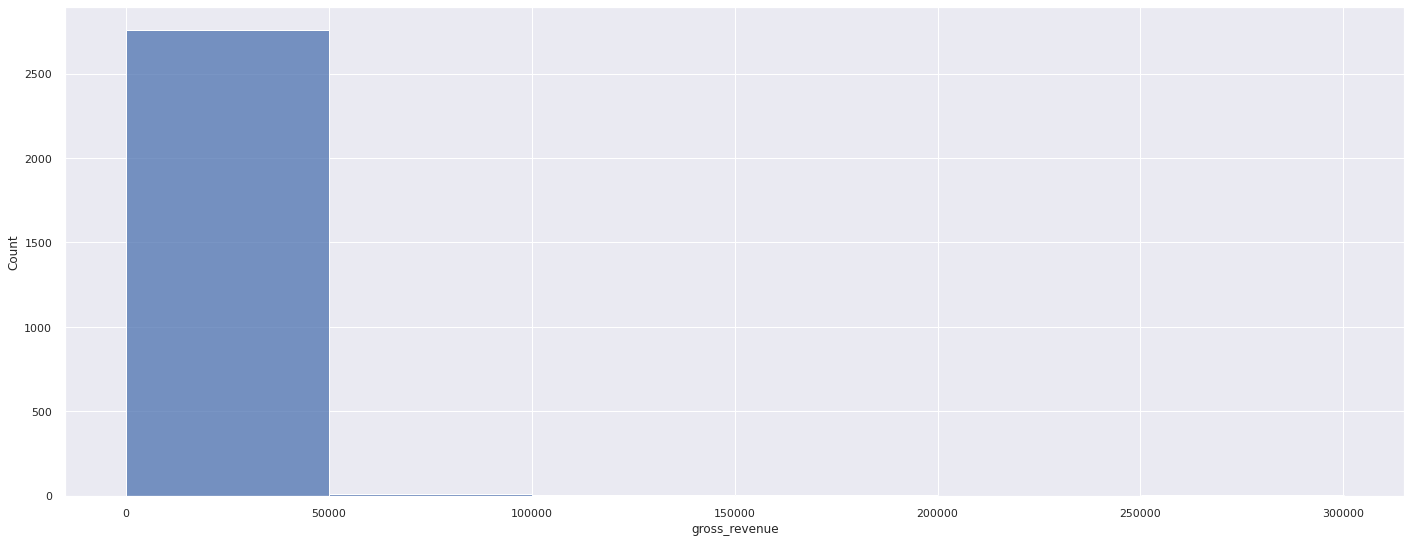

In [83]:
sns.histplot(df4['gross_revenue'], binwidth=50000);

### <font color='d2b48c'>4.1.2 Recency Days</font>

In [121]:
df4[['customer_id','recency_days']].sort_values('recency_days', ascending=False).head()

,customer_id,recency_days
0,17850,372.0
296,15332,366.0
645,16499,360.0
728,15224,358.0
218,12967,358.0


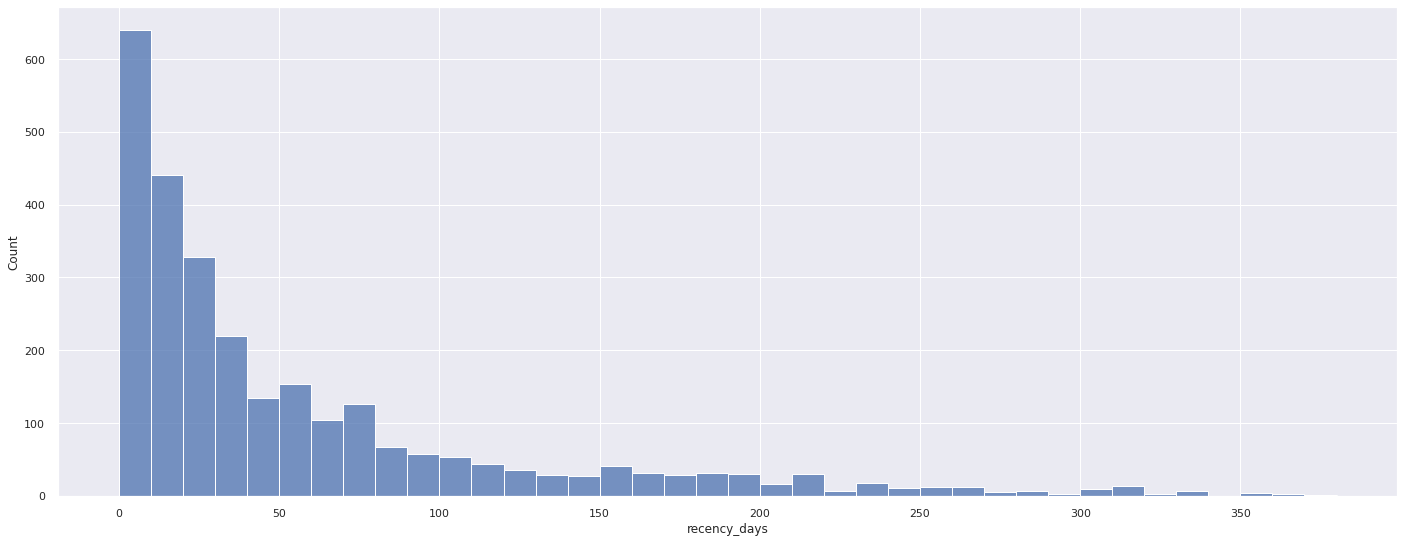

In [80]:
sns.histplot(df4['recency_days'], binwidth=10);

### <font color='d2b48c'>4.1.3 Quantity of Purchases</font>

In [122]:
df4[['customer_id','qnt_purchases']].sort_values('qnt_purchases', ascending=False).head()

,customer_id,qnt_purchases
47,12748,206.0
66,14911,199.0
68,17841,124.0
278,13089,97.0
8,15311,91.0


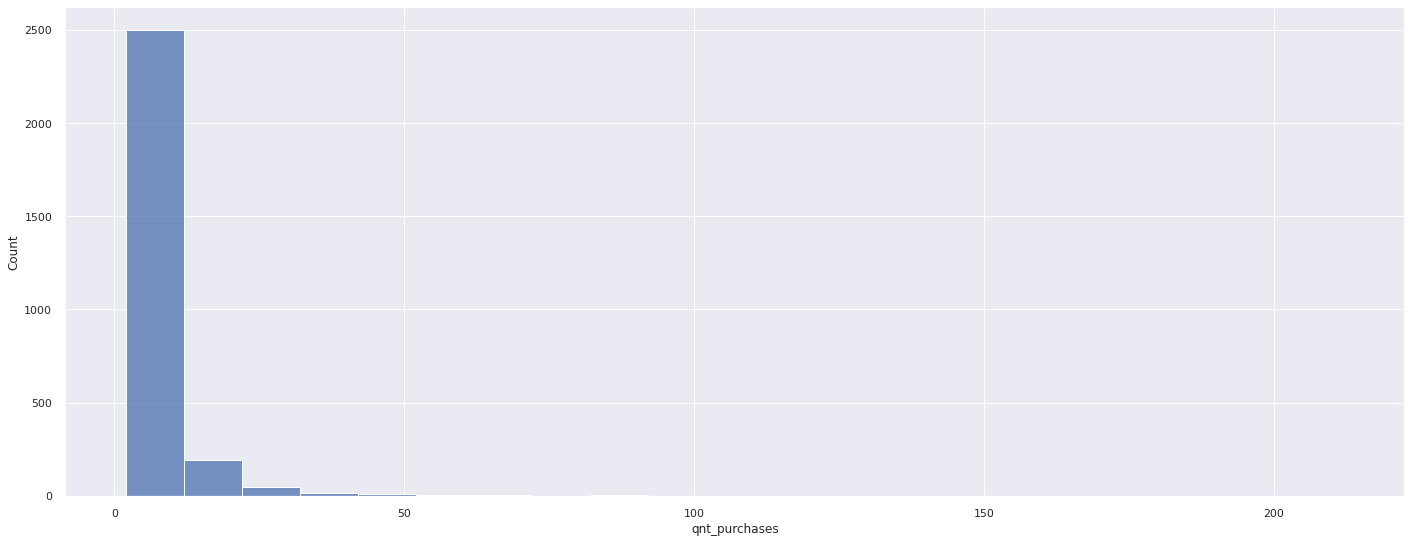

In [87]:
sns.histplot(df4['qnt_purchases'], binwidth=10);

### <font color='d2b48c'>4.1.4 Variety of Products</font>

In [123]:
df4[['customer_id','var_products']].sort_values('var_products', ascending=False).head()

,customer_id,var_products
68,17841,7838.0
66,14911,5673.0
4413,14096,5095.0
47,12748,4580.0
96,14606,2698.0


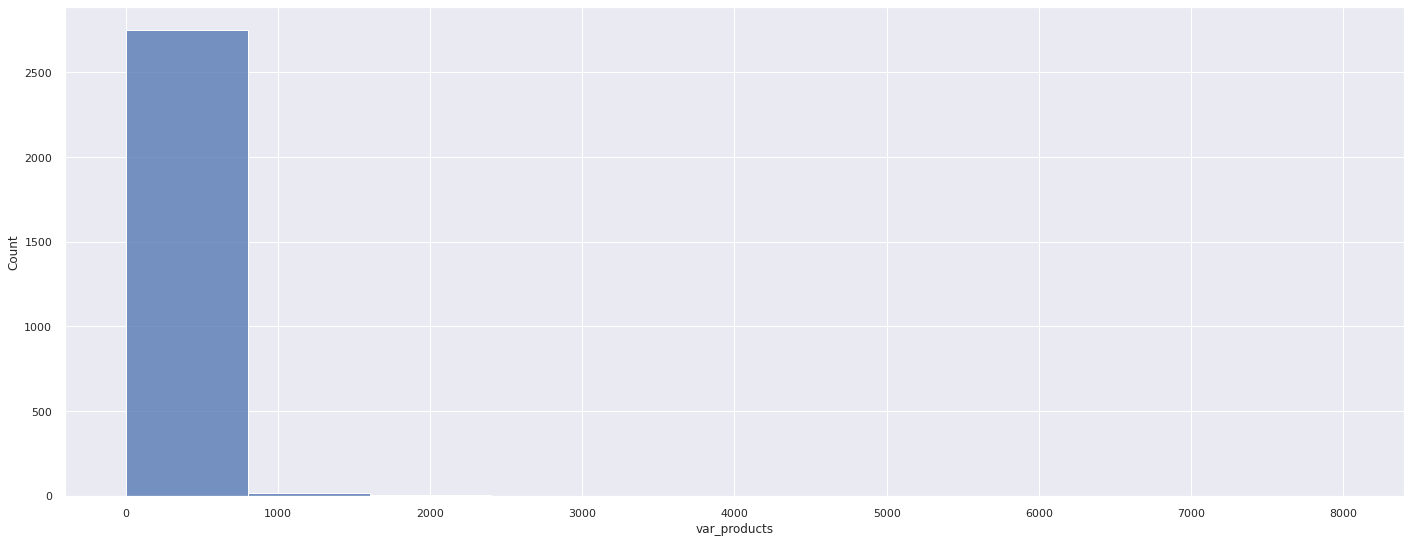

In [96]:
sns.histplot(df4['var_products'], binwidth=800);

### <font color='d2b48c'>4.1.5 Quantity of Items</font>

In [124]:
df4[['customer_id','qnt_items']].sort_values('qnt_items', ascending=False).head()

,customer_id,qnt_items
1017,14646,196844.0
3341,16446,80997.0
66,14911,80263.0
1150,12415,77373.0
433,17450,69993.0


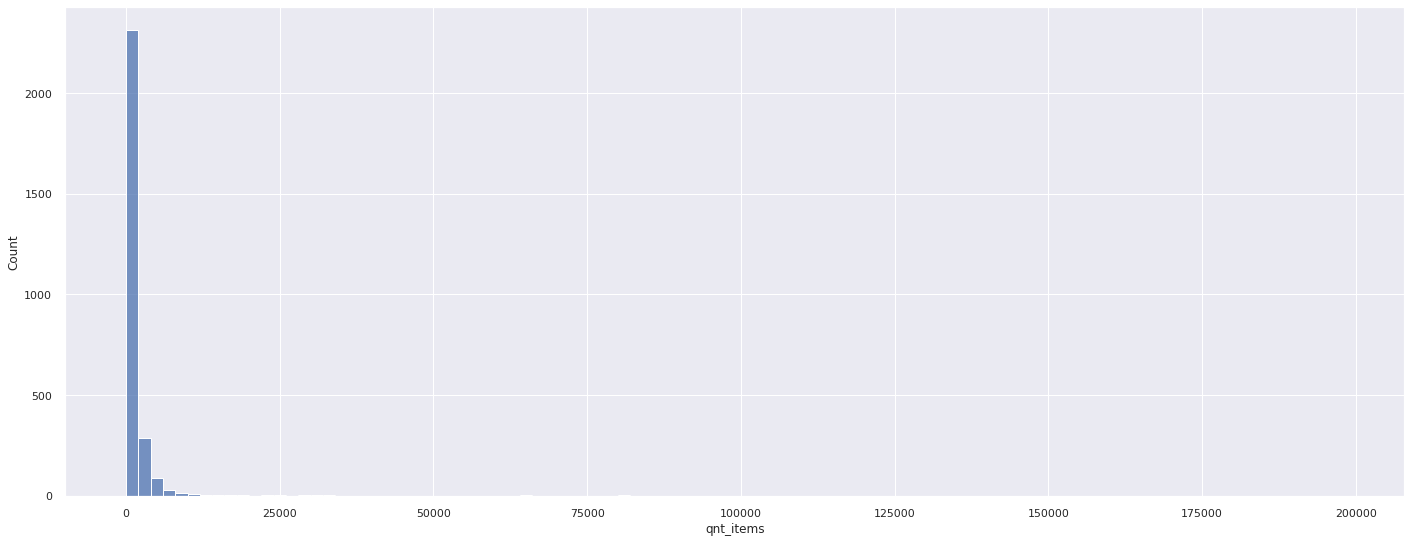

In [95]:
sns.histplot(df4['qnt_items'], binwidth=2000);

### <font color='d2b48c'>4.1.6 Average Ticket</font>

In [125]:
df4[['customer_id','avg_ticket']].sort_values('avg_ticket', ascending=False).head()

,customer_id,avg_ticket
3341,16446,56157.5000
1262,15749,4453.4300
1136,16532,1687.2000
601,12755,952.9875
3784,12798,872.1300


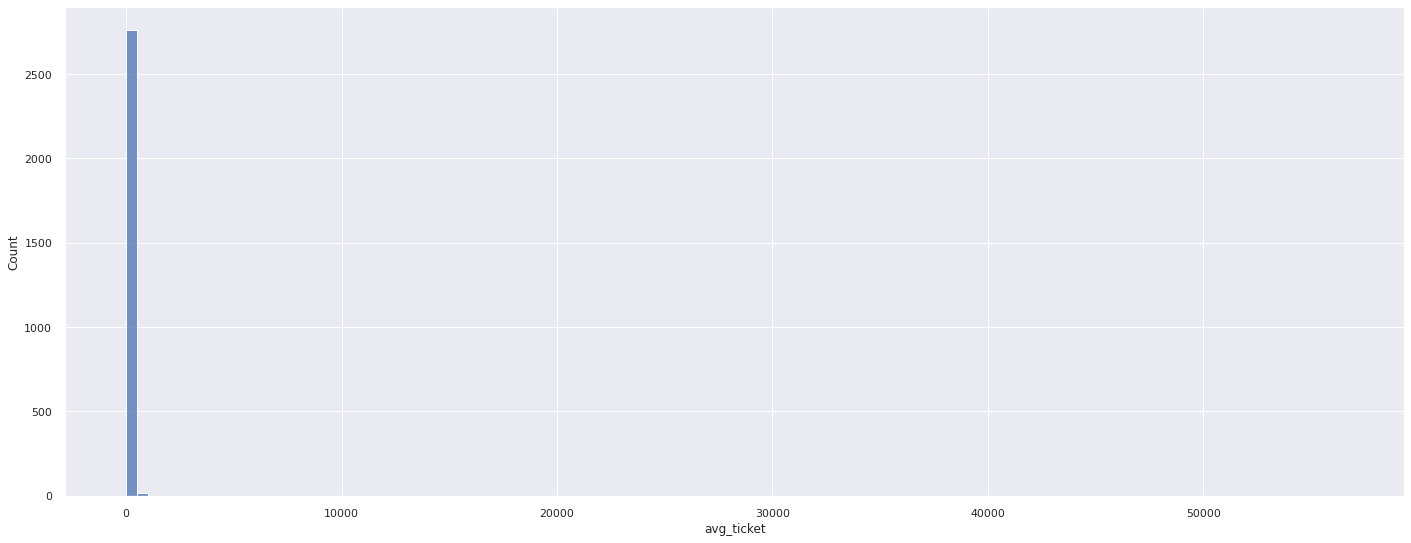

In [103]:
sns.histplot(df4['avg_ticket'], binwidth=500);

In [73]:
df3[df3['customer_id']==16446]

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
194354,553573,22980,1,2017-05-16,1.65,United Kingdom,16446
194355,553573,22982,1,2017-05-16,1.25,United Kingdom,16446
540421,581483,23843,80995,2017-12-07,2.08,United Kingdom,16446
540422,C581484,23843,-80995,2017-12-07,2.08,United Kingdom,16446


### <font color='d2b48c'>4.1.7 Average Recency Days</font>

In [126]:
df4[['customer_id','avg_recency_days']].sort_values('avg_recency_days', ascending=False).head()

,customer_id,avg_recency_days
64,14594,366.0
207,14865,365.0
32,13255,364.0
468,13173,363.0
304,18156,357.0


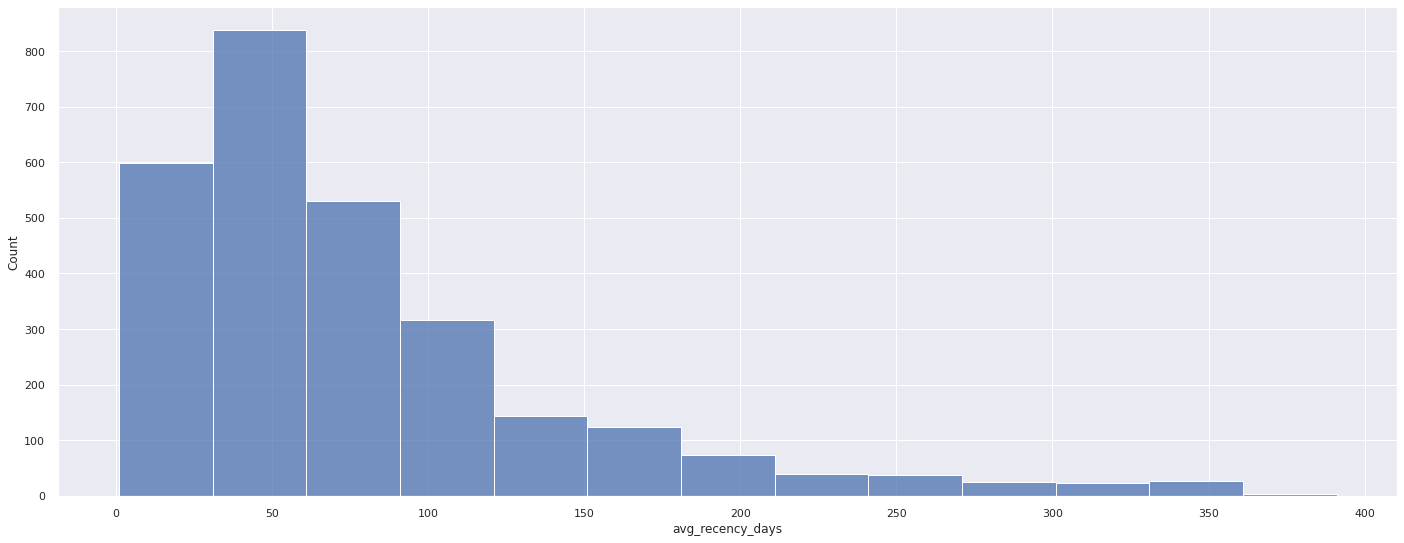

In [106]:
sns.histplot(df4['avg_recency_days'], binwidth=30);

### <font color='d2b48c'>4.1.8 Frequency of Purchases</font>

In [127]:
df4[['customer_id','freq_purchase']].sort_values('freq_purchase', ascending=False).head()

,customer_id,freq_purchase
0,17850,17.000000
5586,18139,3.000000
5706,15060,2.000000
4923,17509,1.142857
3871,16498,1.000000


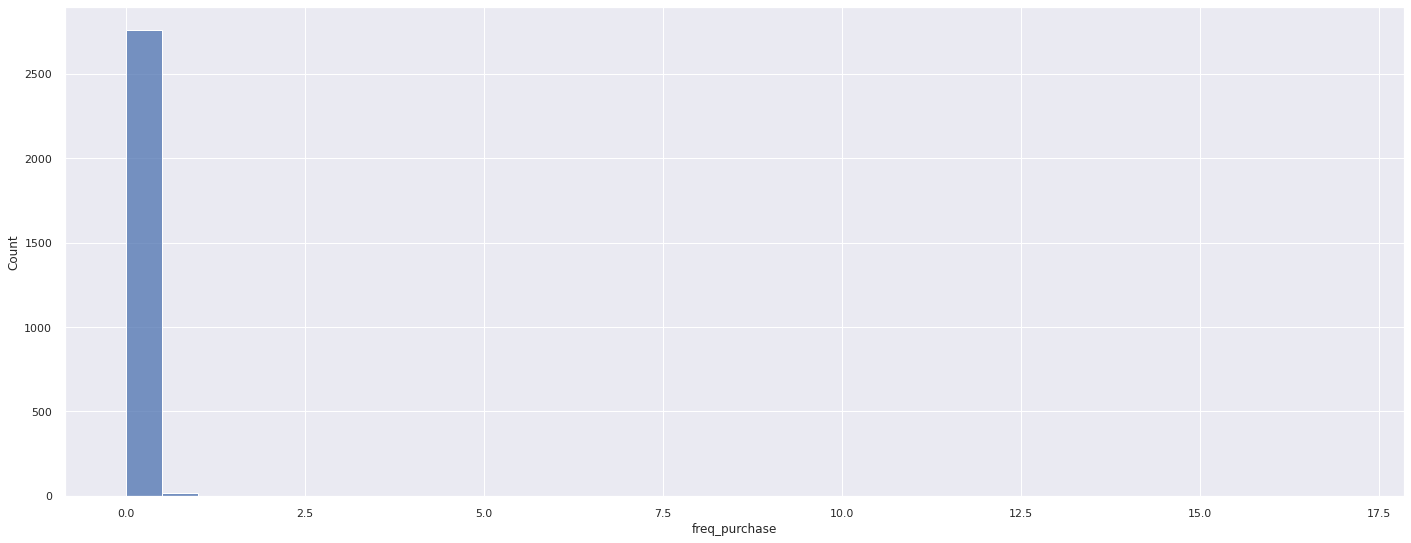

In [109]:
sns.histplot(df4['freq_purchase'], binwidth=0.5);

### <font color='d2b48c'>4.1.9 Quantity of Returns</font>

In [128]:
df4[['customer_id','qtd_returned']].sort_values('qtd_returned', ascending=False).head()

,customer_id,qtd_returned
3341,16446,80995.0
1262,15749,9014.0
12,16029,8004.0
970,12931,4427.0
2550,14607,3768.0


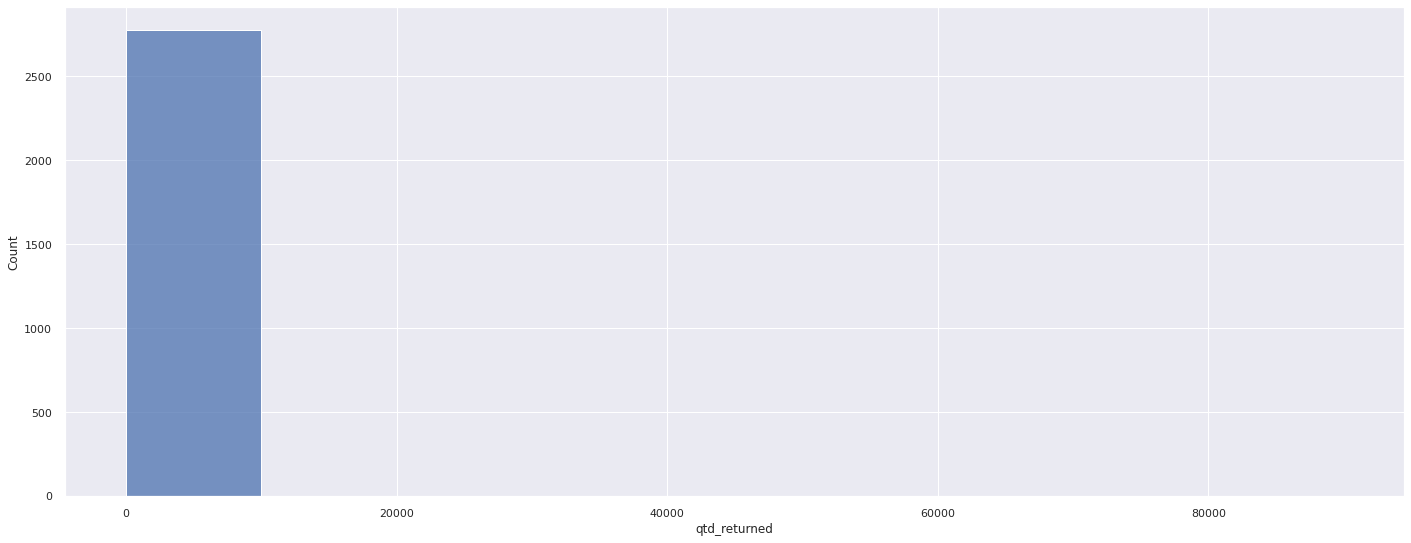

In [112]:
sns.histplot(df4['qtd_returned'], binwidth=10000);

### <font color='d2b48c'>4.1.10 Frequency of Returns</font>

In [129]:
df4[['customer_id','freq_returns']].sort_values('freq_returns', ascending=False).head()

,customer_id,freq_returns
214,14573,4.0
4948,15473,3.0
1588,16755,2.0
4523,17317,2.0
3770,12930,2.0


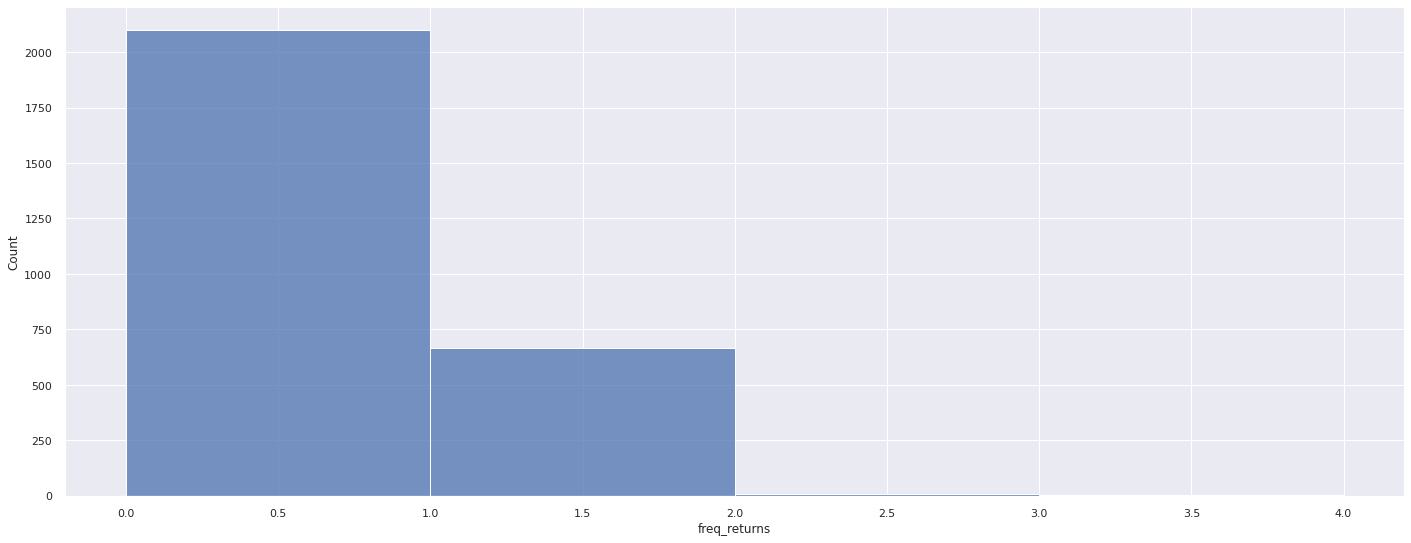

In [116]:
sns.histplot(df4['freq_returns'], binwidth=1);

### <font color='d2b48c'>4.1.11 Average Basket Size</font>

In [130]:
df4[['customer_id','avg_basket_size']].sort_values('avg_basket_size', ascending=False).head()

,customer_id,avg_basket_size
3341,16446,40498.500000
1262,15749,6009.333333
1150,12415,3868.650000
1027,13027,2880.000000
1017,14646,2733.944444


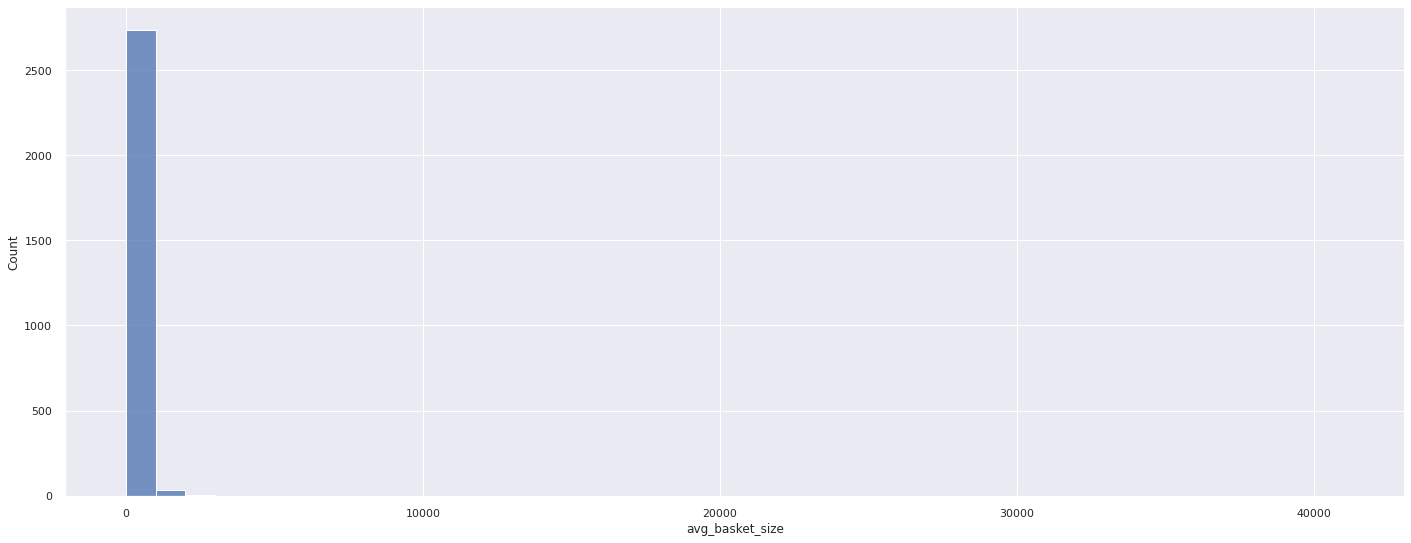

In [117]:
sns.histplot(df4['avg_basket_size'], binwidth=1000);

### <font color='d2b48c'>4.1.12 Average Basket Variety</font>

In [119]:
df4[['customer_id','avg_basket_variety']].sort_values('avg_basket_variety', ascending=False).head()

,customer_id,avg_basket_variety
4413,14096,299.705882
4204,16984,203.500000
5696,13521,145.000000
975,14769,136.125000
1698,17337,135.500000


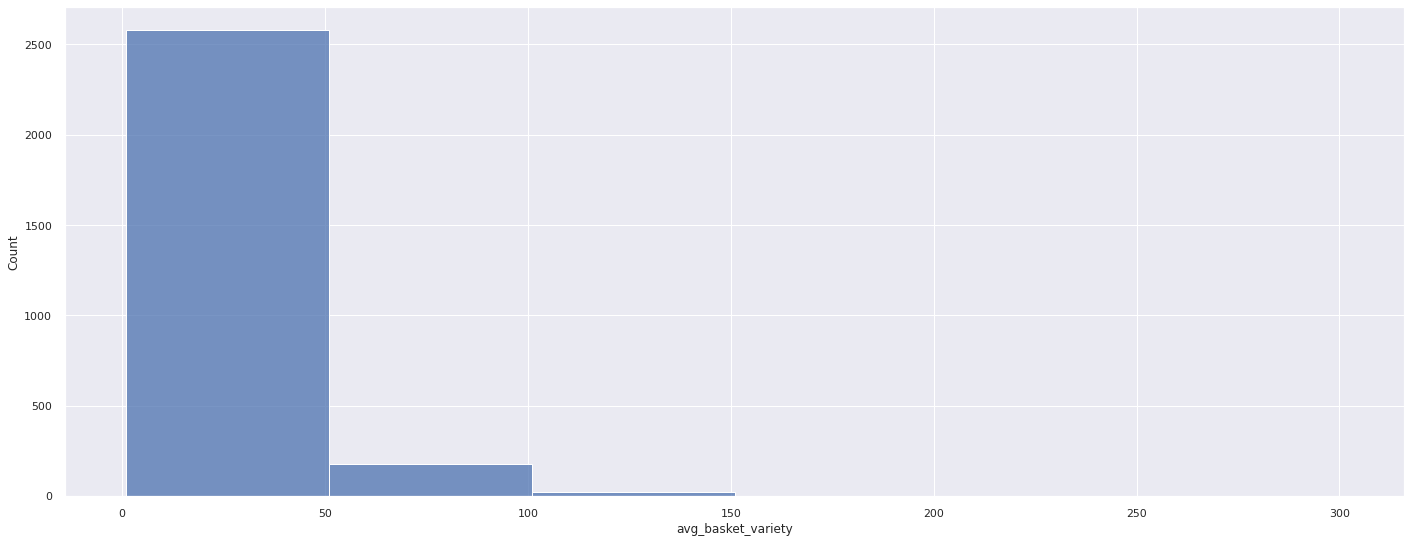

In [118]:
sns.histplot(df4['avg_basket_variety'], binwidth=50);

## <font color='d2b48c'>4.1 Bivariate Analysis</font>

In [131]:
cols = ['customer_id']
df42 = df4.drop(cols, axis=1)

<Figure size 1800x1440 with 0 Axes>

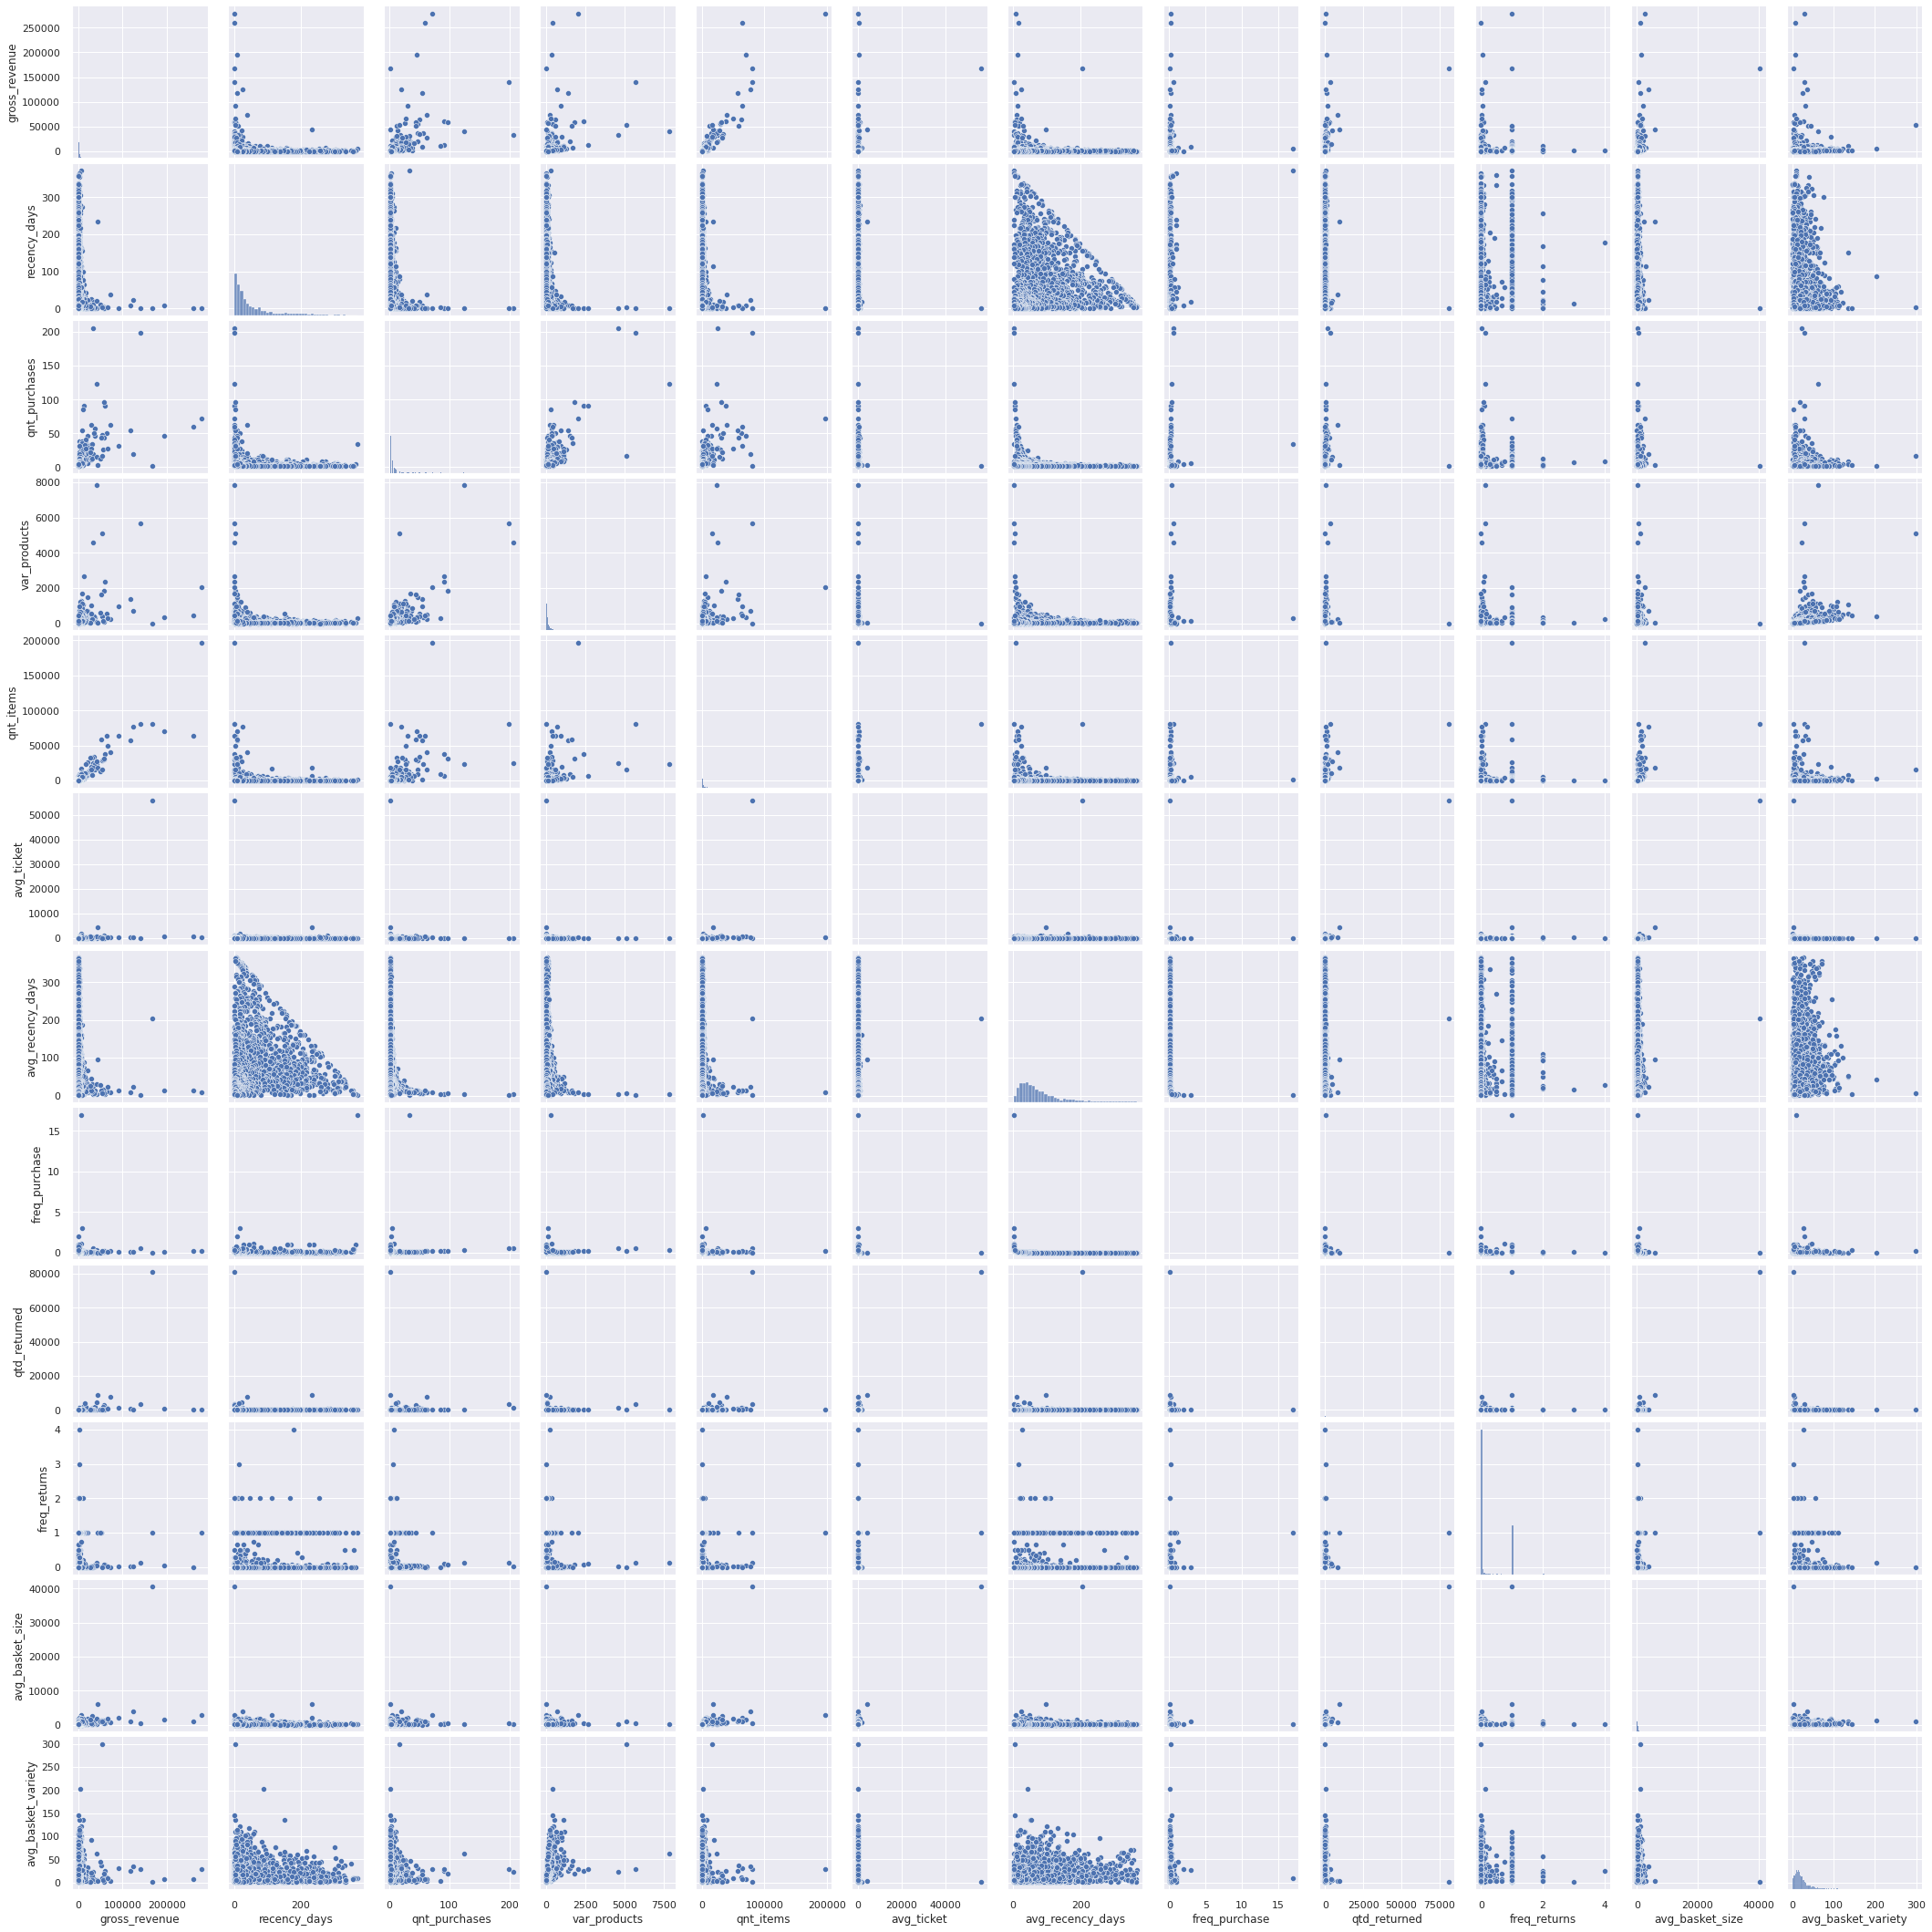

In [132]:
plt.figure(figsize=(25,20))
sns.pairplot(df42)

# <font color='8a795d'>5.0 Data Preparation</font>

In [312]:
#security copy
df5 = df4.copy()

In [313]:
# ss = pp.StandardScaler()

# df5['gross_revenue'] = ss.fit_transform( df5[['gross_revenue']] )
# df5['recency_days'] = ss.fit_transform( df5[['recency_days']] )
# df5['invoice_freq'] = ss.fit_transform( df5[['invoice_freq']] )
# df5['avg_ticket'] = ss.fit_transform( df5[['avg_ticket']] )
# df5['returns'] = ss.fit_transform( df5[['returns']] )

# <font color='8a795d'>6.0 Feature Selection</font>

In [314]:
#security copy
df6 = df5.copy()

# <font color='8a795d'>7.0 Hyperparameter Fine_Tunning</font>

In [315]:
#security copy
X = df6.drop( columns=['customer_id'])

In [316]:
X.head()

,gross_revenue,recency_days,invoice_freq,avg_ticket,returns
0,5391.21,372.0,34.0,18.152222,1.0
1,3237.54,31.0,10.0,18.822907,8.0
2,7281.38,2.0,15.0,29.479271,3.0
3,948.25,95.0,5.0,33.866071,0.0
4,876.00,333.0,3.0,292.000000,3.0


In [317]:
clusters = [2,3,4,5,6,7,8,9]

***Compactness(Cohesion)***
 - O grau de separação entre os clusters dado pela maior distância possível entre os centróides de cada cluster
 
***Separation***
 - O grau de compactação do cluster dado pela menor distância possível entre o centróide e os demais elementos do cluster

***Métricas***
 - WSS (Within-Cluster Sum of Square): Compactness
 - SS (Silhouette Score): Compactness and Separation

## <font color='d2b48c'>7.0.1 Within-Cluster Sum of Square (WSS)</font>

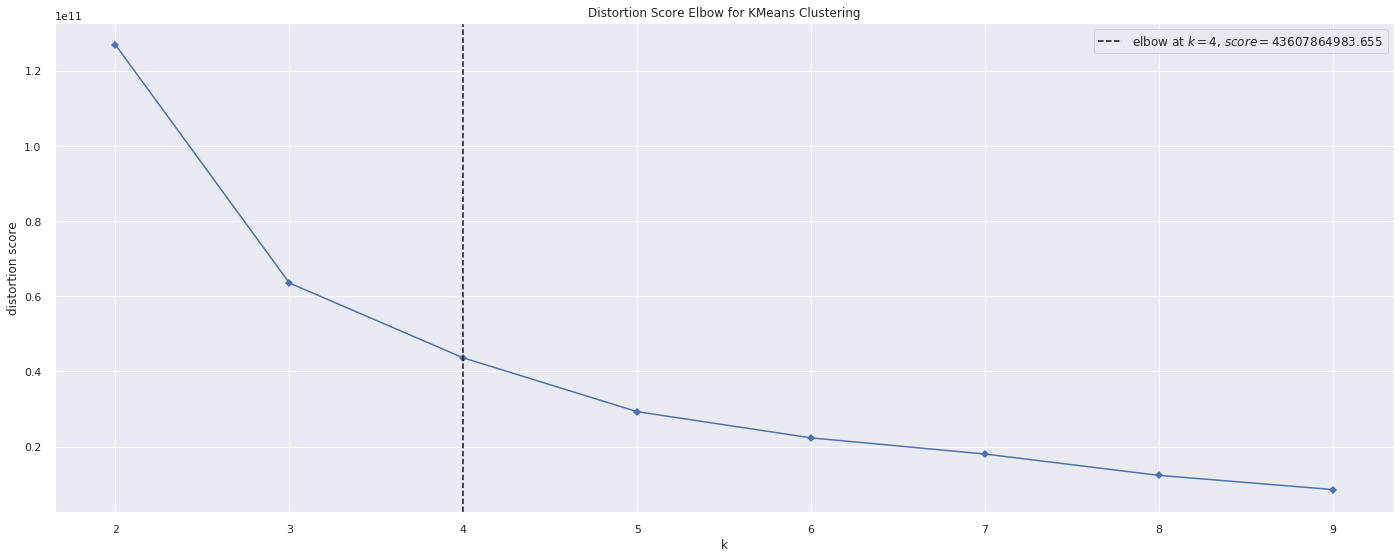

In [318]:
kmeans = KElbowVisualizer( cl.KMeans(), k=clusters, timings=False)
kmeans.fit(X)
kmeans.show();

## <font color='d2b48c'>7.0.2 Silhouette Score (SS)</font>

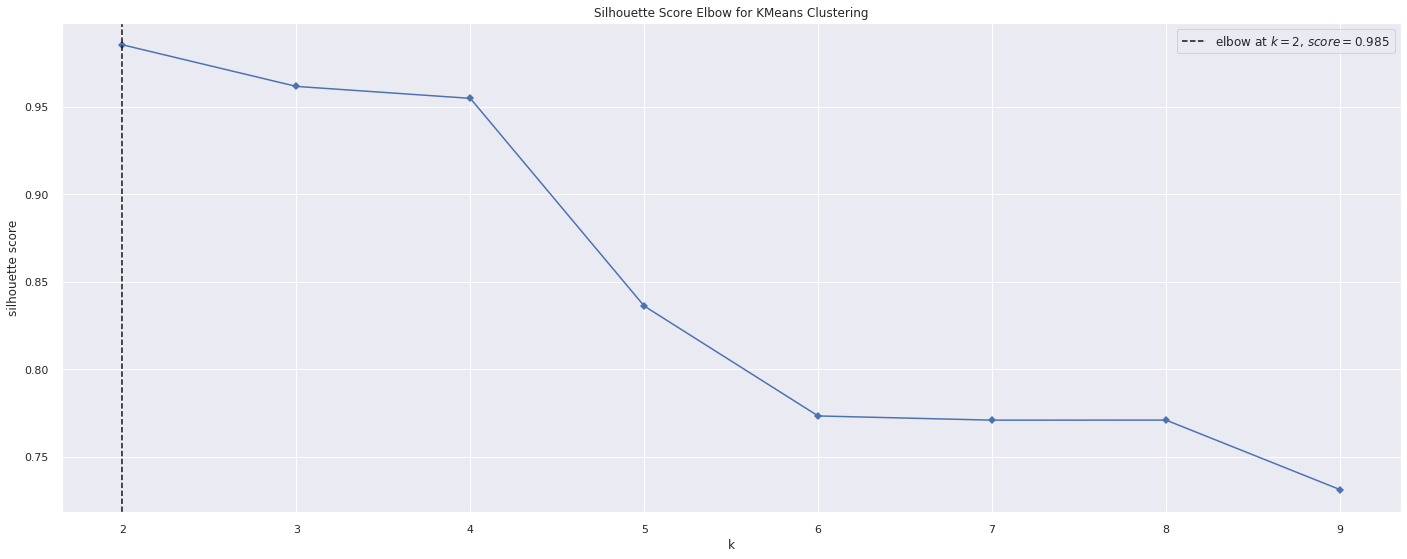

In [319]:
# Ai: distância média do ponto i a todos os demais elementos do próprio cluster
# Bi: distância média do ponto i a todos os elementos do cluster mais próximo
# Si: silhouette de cada ponto i do dataset, dada pelo quociente da diferença entre Bi e Ai e o maior deles
# SS: média das silhouettes de cada ponto do dataset. Quanto mais próximo de 1, melhor o k (nº de clusters)
# essa métrica considera tanto as distâncias intracluster quanto as distâncias entre clusters.
kmeans = KElbowVisualizer( cl.KMeans(), k=clusters, metric='silhouette', timings=False)
kmeans.fit(X)
kmeans.show();

## <font color='d2b48c'>7.1 Silhouette Analysis</font>

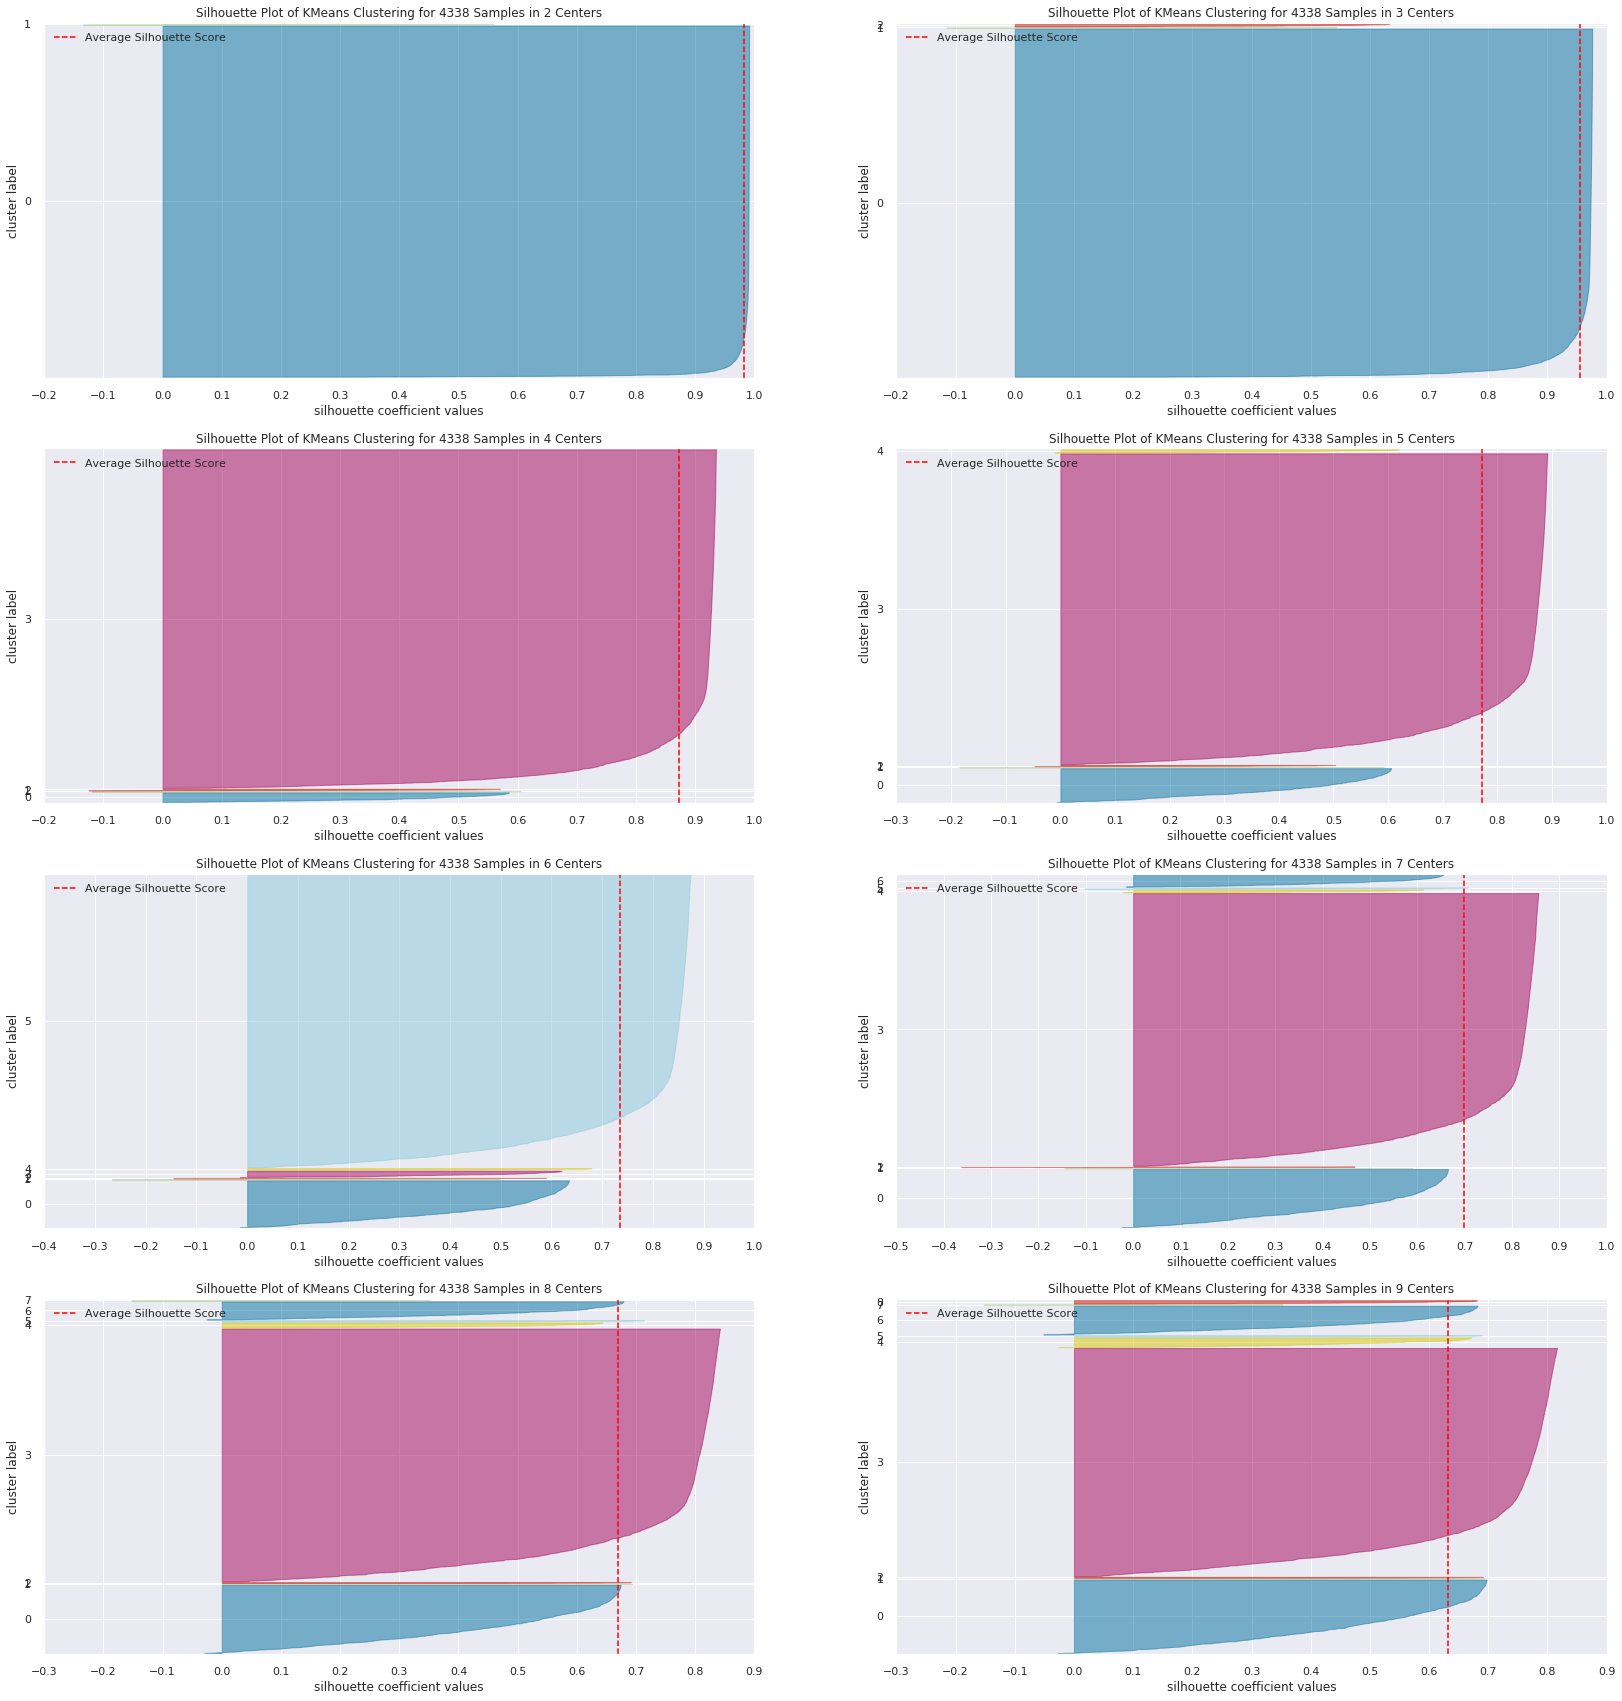

In [320]:
fig, ax = plt.subplots( 4, 2, figsize=(28,30) )

for k in clusters:
    km = cl.KMeans( n_clusters=k, init='random', n_init=10, max_iter=300, random_state=42 )
    q, mod = divmod(k,2)
    visualizer = SilhouetteVisualizer( km, colors='yellowbrick', ax=ax[q-1][mod] )
    visualizer.fit(X)
    visualizer.finalize()

# <font color='8a795d'>8.0 Model Training</font>

## <font color='d2b48c'>8.1 K-Means</font>

In [321]:
# model definition
k = 3
kmeans = cl.KMeans( init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)
    
# model training
kmeans.fit( X )

# clustering
labels = kmeans.labels_

## <font color='d2b48c'>8.2 Cluster Validation</font>

In [322]:
# Within-Cluster Sum of Square (WSS)
print("WSS value: {}".format(kmeans.inertia_))

# Silhouette Score (SS)
print("SS value: {}".format(m.silhouette_score( X, labels, metric='euclidean')))

WSS value: 64388638746.77063
SS value: 0.9544892933536412


# <font color='8a795d'>9.0 Cluster Analysis</font>

In [323]:
df9 = df6.copy()
df9['cluster'] = labels
df9.head()

,customer_id,gross_revenue,recency_days,invoice_freq,avg_ticket,returns,cluster
0,17850,5391.21,372.0,34.0,18.152222,1.0,0
1,13047,3237.54,31.0,10.0,18.822907,8.0,0
2,12583,7281.38,2.0,15.0,29.479271,3.0,0
3,13748,948.25,95.0,5.0,33.866071,0.0,0
4,15100,876.00,333.0,3.0,292.000000,3.0,0


## <font color='d2b48c'>9.1 Visual Inspection</font>

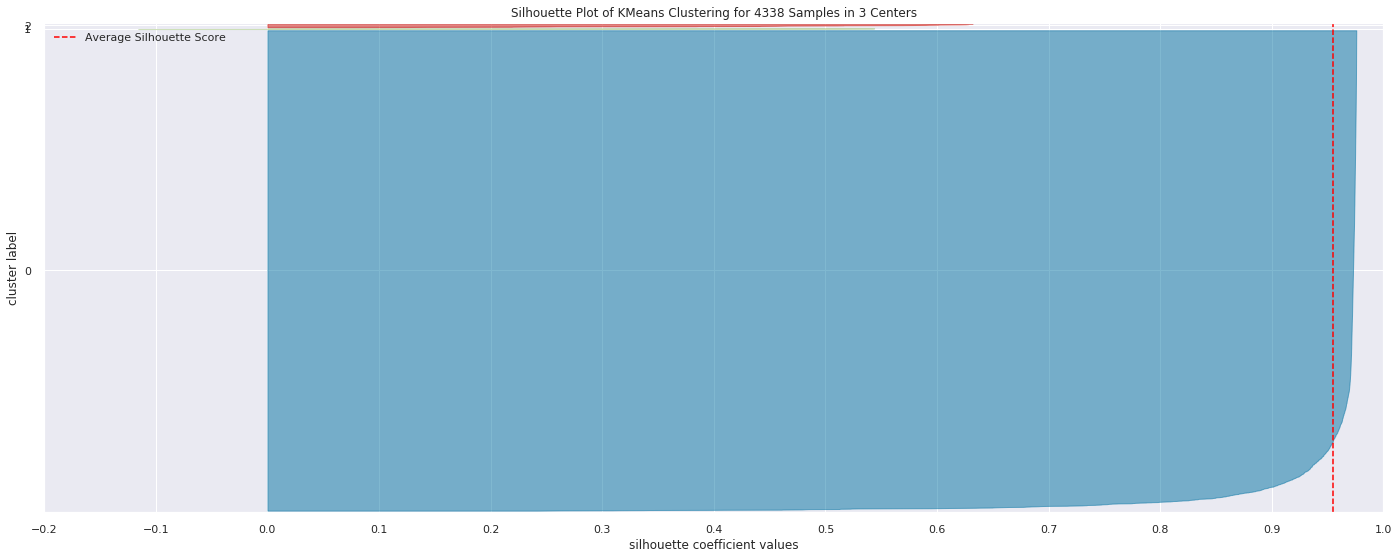

In [324]:
visualizer = SilhouetteVisualizer( kmeans, colors='yellowbrick')
visualizer.fit(X)
visualizer.finalize()

## <font color='d2b48c'>9.2 2D Plot</font>

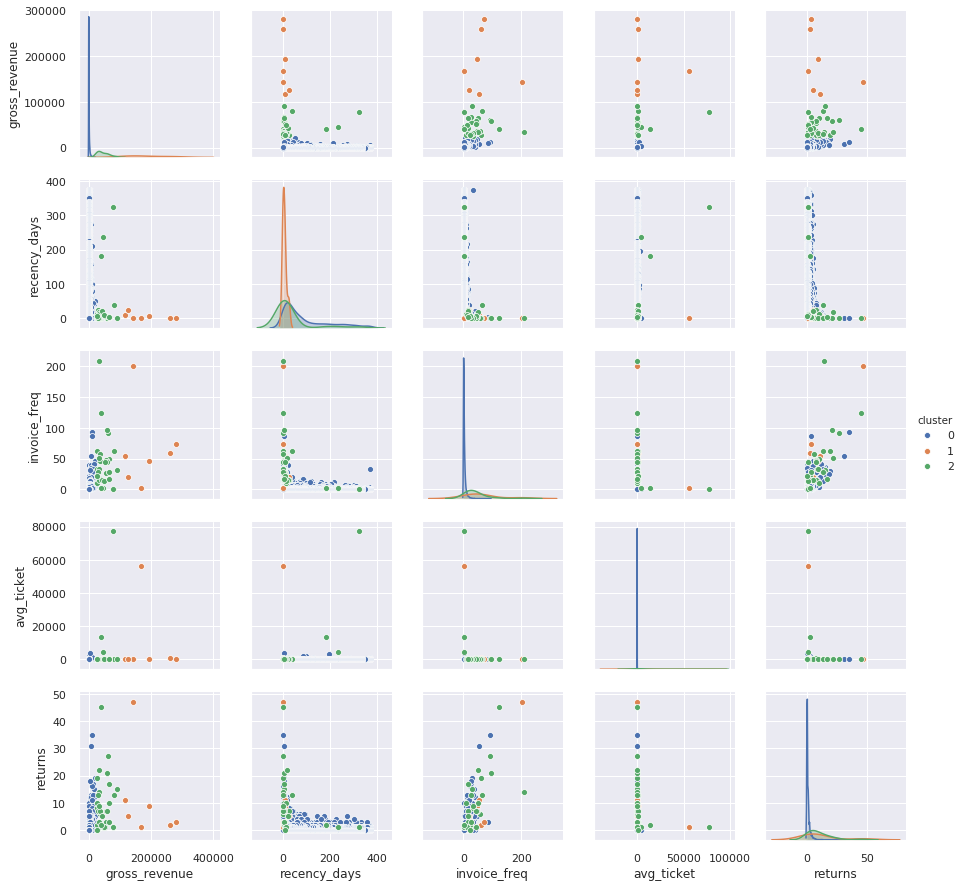

In [325]:
df_viz = df9.drop( columns='customer_id', axis=1 )
sns.pairplot( df_viz, hue='cluster', vars=df_viz.columns[:-1] );

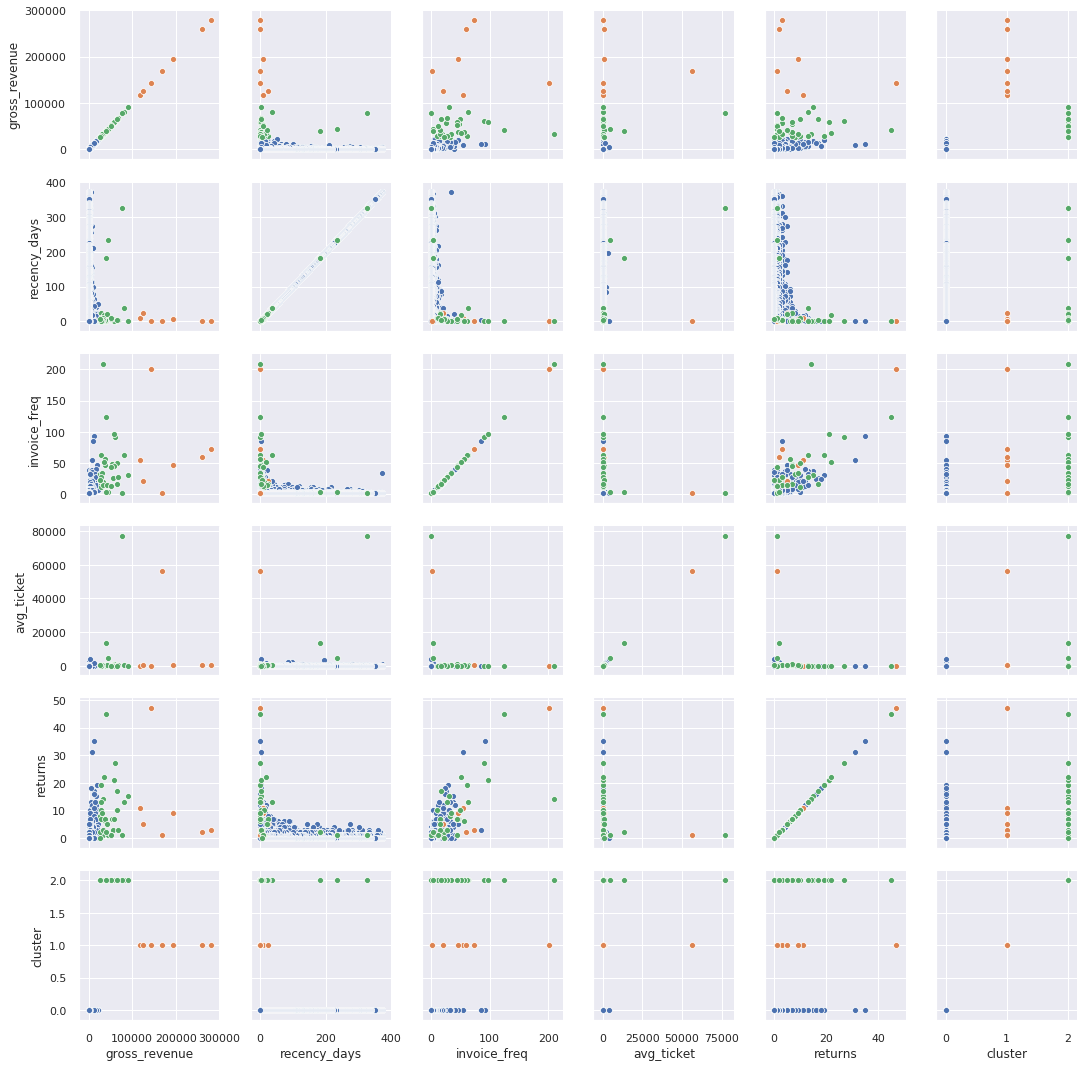

In [326]:
df_viz = df9.drop( columns='customer_id', axis=1 )
g = sns.PairGrid(df_viz, hue ='cluster')
g = g.map(sns.scatterplot)

## <font color='d2b48c'>9.3 UMAP</font>

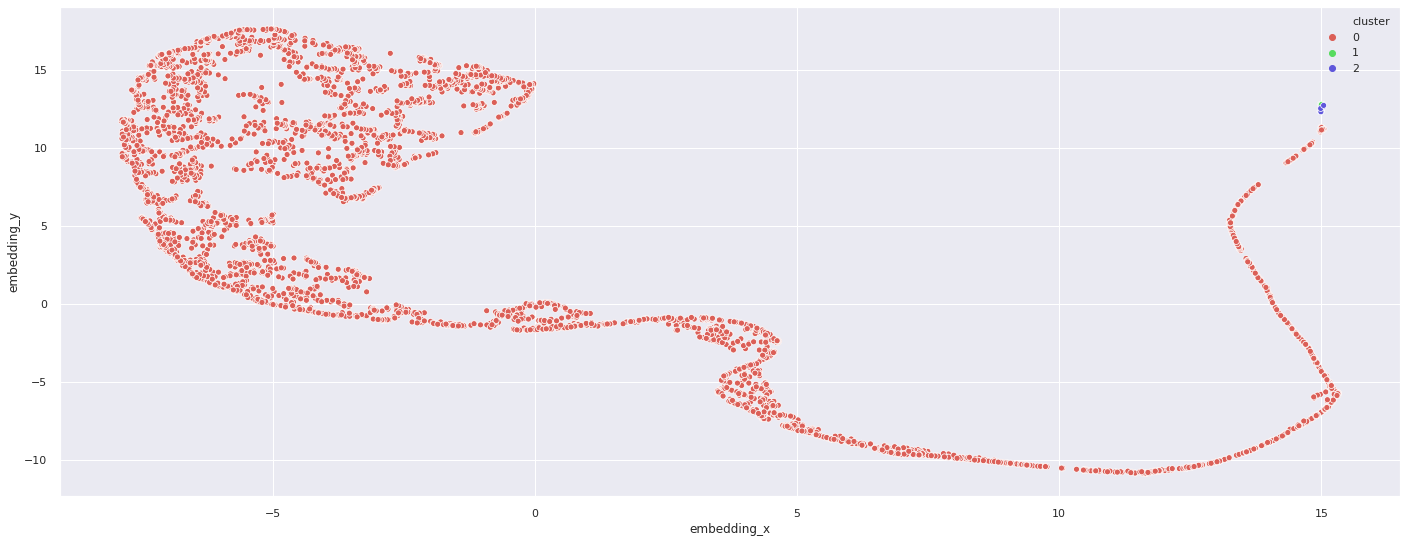

In [327]:
reducer = umap.UMAP( n_neighbors=20, random_state=42 )
embedding = reducer.fit_transform( X )

# embedding
df_viz['embedding_x'] = embedding[:, 0]
df_viz['embedding_y'] = embedding[:, 1]

# plot
sns.scatterplot( x='embedding_x', 
                y='embedding_y', 
                hue='cluster', 
                palette=sns.color_palette('hls', n_colors=len( df_viz['cluster'].unique() ) ),
                data=df_viz )

## <font color='d2b48c'>9.4 t-SNE</font>

## <font color='d2b48c'>9.5 Cluster Profile</font>

In [328]:
# Number of customers
df_cluster = df9[['customer_id','cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customers'] = 100*( df_cluster['customer_id']/df_cluster['customer_id'].sum() )
df_cluster = df_cluster.rename(columns={'customer_id':'customers'})

# Average Gross Revenue
df_avg_gross_rev = df9[['gross_revenue','cluster']].groupby('cluster').mean().reset_index()
df_avg_gross_rev['perc_revenue'] = 100*( df_avg_gross_rev['gross_revenue']/df_avg_gross_rev['gross_revenue'].sum() )
df_cluster = pd.merge( df_cluster, df_avg_gross_rev, on='cluster', how='inner' )

# Average Recency Days
df_avg_rec_days = df9[['recency_days','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_rec_days, on='cluster', how='inner' )

# Average Invoice Frequency
df_avg_inv_freq = df9[['invoice_freq','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_inv_freq, on='cluster', how='inner' )

# AVerage Ticket
df_avg_ticket = df9[['avg_ticket','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_ticket, on='cluster', how='inner' )

In [329]:
# Strength: candidate to Insiders
df_cluster['strength'] = (df_cluster['gross_revenue']+df_cluster['invoice_freq']+df_cluster['avg_ticket'])/df_cluster['recency_days']
insiders = df_cluster.loc[df_cluster['strength']==df_cluster['strength'].max()]
insiders_cluster = insiders['cluster'].iloc[0]

In [330]:
df_cluster

,cluster,customers,perc_customers,gross_revenue,perc_revenue,recency_days,invoice_freq,avg_ticket,strength
0,0,4300,99.124020,1438.190381,0.619977,92.646512,3.894884,32.199485,15.913009
1,1,7,0.161365,184143.690000,79.380870,6.142857,65.428571,8250.909388,31330.702226
2,2,31,0.714615,46393.013871,19.999153,30.032258,42.774194,3235.278454,1653.923805


In [331]:
# Show Cluster Profiles
for k in range(len(df_cluster)):
    if k == insiders_cluster:
        print('\033[1m\033[4m\033[91m'+'Cluster {}'.format(df_cluster['cluster'][k])+' (Insiders)'+'\033[0m')
    else:
        print('\033[1m'+'\033[4m'+'Cluster {}'.format(df_cluster['cluster'][k])+'\033[0m')    
    print('N° de Customers: {}'.format(df_cluster['customers'][k])+
            ' ({:.2f}'.format(df_cluster['perc_customers'][k])+'% dos Customers)')
    print('Receita media: ${:.2f}'.format(df_cluster['gross_revenue'][k])+
            ' ({:.1f}'.format(df_cluster['perc_revenue'][k])+'% da Receita)')
    print('Recencia media: {:.0f}'.format(df_cluster['recency_days'][k])+' dias')
    print('Frequencia media: {:.0f}'.format(df_cluster['invoice_freq'][k])+' compras')
    print('Ticket Medio: ${:.2f}'.format(df_cluster['avg_ticket'][k])+'\n')

Cluster 0
N° de Customers: 4300 (99.12% dos Customers)
Receita media: $1438.19 (0.6% da Receita)
Recencia media: 93 dias
Frequencia media: 4 compras
Ticket Medio: $32.20

Cluster 1 (Insiders)
N° de Customers: 7 (0.16% dos Customers)
Receita media: $184143.69 (79.4% da Receita)
Recencia media: 6 dias
Frequencia media: 65 compras
Ticket Medio: $8250.91

Cluster 2
N° de Customers: 31 (0.71% dos Customers)
Receita media: $46393.01 (20.0% da Receita)
Recencia media: 30 dias
Frequencia media: 43 compras
Ticket Medio: $3235.28



# <font color='8a795d'>10.0 Deploy To Production</font>